In [1]:
from numpy import exp, linspace, random
from scipy.optimize import curve_fit

from scipy import integrate, optimize
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

import matplotlib.gridspec as gridspec
from IPython.display import display, Math, Latex

#Ndays=674
#Ndays=795
Ndays=802

alpha=0.57 #// alpha: Transmission rate due to contacts with UNDETECTED asymptomatic infected
beta=0.0114 #// beta: Transmission rate due to contacts with DETECTED asymptomatic infected
delta=0.0114 #// delta: Transmission rate due to contacts with DETECTED symptomatic infected 
gamma=0.456 #// gamma: Transmission rate due to contacts with UNDETECTED symptomatic infected 
epsilon=0.171 #// epsilon: Detection rate for ASYMPTOMATIC
zeta=0.1254 #// zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic 
lamda=0.0342 #// lambda: Recovery rate for undetected asymptomatic infected
eta=0.1254 #// eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic
rho=0.0342 #// rho: Recovery rate for detected asymptomatic infected 
theta=0.3705 #// theta: Detection rate for ASYMPTOMATIC 
mu=0.0171 #// mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
kappa=0.0171 #// kappa: Recovery rate for undetected symptomatic infected
nu=0.0274 #// nu: Worsening rate: DETECTED symptomatic infected develop life-threatening
xi=0.0171 #// Xi: Recovery rate for detected symptomatic infected
sigma=0.0171 #// sigma: Recovery rate for life-threatened symptomatic infected
tau=0.1605 #// tau: Mortality rate for infected with life-threatening symptoms

alpha>gamma>Beta~delta
theta>epsilon
mu ~ nu
lamda~chi~rho~sigma~kappa

In [2]:
#####            
            

# I translated the R0 in C++ from Dr. Ketevi into Python
def rzero( t,par): 
    
    alpha   = par[0]
    beta    = par[1]
    delta   = par[2]
    gamma   = par[3]
    epsilon = par[4]
    zeta    = par[5]
    lamda   = par[6]
    eta     = par[7]
    rho     = par[8]
    theta   = par[9]
    mu      = par[10]
    kappa   = par[11]
    nu      = par[12]
    chi     = par[13]
    sigma   = par[14]
    tau_a   = par[15]
    tau_b   = par[16]
    alpha_p = par[17]
    phi     = par[18]

      # Parameters
    r1=epsilon+zeta+lamda
    r2=eta+rho
    r3=theta+mu+kappa
    r4=nu+chi+tau_a
    r5=sigma+tau_b


      # Initial R0
    R0_initial=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+ delta*zeta*theta/(r1*r3*r4)

    R0 = R0_initial;

      # "Control" binary variables to compute the new R0 every time a policy has
      # changed the parameters
    plottato = 0;
    plottato1 = 0
   
    plottato11 = 0;
    plottato_bis = 0;
    plottato_tris = 0;
    plottato_trisp = 0;
    plottato_trispp = 0;
    plottato_quat = 0;
    plottato_quats=0
   
    plottato_quats1=0
    plottato_qint=0
    plottato_qintp=0
    plottato_qintpp=0
    plottato_qintpp1=0
    plottato_qintpp2=0
   
    plottato_qint0=0
    plottato_qint1=0
    plottato_qint2=0
    plottato_qint3=0
    plottato_qint3p=0
    plottato_qint3pp=0
   
    plottato_qint02 =0
    plottato_qint3ppp=0
    plottato_quatppp=0
    plottato_quatpppp=0
    plottato_quatpppp1=0
    plottato_quatpppp2=0
    plottato_quatpppp3=0
    plottato_quatpppp4=0
    plottato_quatpppp5=0
    plottato_quatpppp6=0
    plottato_quatpppp7=0
    plottato_quatpppp8=0
    plottato_quatpppp9=0
    plottato_quatpppp10=0
    plottato_quatpppp11=0
    plottato_quatpppp12=0
    plottato_quatpppp13=0
    plottato_quatpppp14=0
    plottato_quatpppp15=0
    plottato_quatpppp16=0
    plottato_quatpppp17=0
    plottato_quatpppp18=0
    plottato_quatpppp19=0
    plottato_quatpppp20=0
    plottato_quatpppp21=0
    plottato_quatpppp22=0
    plottato_quatpppp23=0
    plottato_quatpppp24=0
    plottato_quatpppp25=0
    plottato_quatpppp26=0
    plottato_quatpppp27=0
    plottato_quatpppp28=0
    plottato_quatpppp29=0
    plottato_quatpppp30=0
    plottato_quatpppp31=0
    plottato_quatpppp32=0
    plottato_quatpppp33=0
    plottato_quatpppp34=0
    plottato_quatpppp35=0
    plottato_quatpppp36=0
    plottato_quatpppp37=0
    plottato_quatpppp38=0
    plottato_quatpppp39=0
    plottato_quatpppp40=0    
    
      # Basic social distancing (awareness, schools closed)
        
        
    if (t<368):
        tau_a   = 0.00
        phi     = 0.00
        alpha_p = 0.00    
        
    if (t >= 0 ):
        alpha= 0.47; #//0.4218;
        gamma= 0.33; #//0.285;
        beta = 0.025; #//0.0057;
        delta= 0.025; #//0.0057;

        lamda=0.0; #//0.08;

        rho=0.0;
        kappa=0.0;
        chi=0.0;
        sigma=0.0;
        tau_b=0.0;

        # Compute the new R0
        if (plottato == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho;
            r3=theta+mu+kappa;
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_primemisure=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)
            plottato = 1;
            R0 = R0_primemisure;




            # Screening limited to / focused on symptomatic subjects

    if (t>13):
        alpha= 0.2; #//0.4218;
        gamma= 0.1; #//0.285;
        beta = 0.004; #//0.0057;
        delta= 0.004; #//0.0057;

        epsilon=0.16; #//0.1425;
        theta=0.3705;

        mu = 0.012; ##//0.008;
        nu = 0.022; #//0.015;

        zeta=0.19; #//0.034;
        eta=0.19; #//0.034;

        lamda=0.01; #//0.08;

        rho=0.01;
        kappa=0.01;
        chi=0.01;
        sigma=0.00002;
        
        tau_b=0.05;
        if (plottato1 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_primemisureeps=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)
            plottato1 = 1
            R0 = R0_primemisureeps

    if (t>22):
        alpha= 0.3; #//0.4218;
        gamma= 0.25; #//0.285;
        beta = 0.004; #//0.0057;
        delta= 0.004; #//0.0057;

        epsilon=0.16; #//0.1425;
        theta=0.3705;

        mu = 0.012; ##//0.008;
        nu = 0.022; #//0.015;

        zeta=0.19; #//0.034;
        eta=0.19; #//0.034;

        lamda=0.2; #//0.08;

        rho=0.07;
        kappa=0.07;
        chi=0.07;
        sigma=0.25;
        
        tau_b=0.05; 
        
        # { // Compute the new R0

        if (plottato11 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_secondemisure1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato11 = 1
            R0 = R0_secondemisure1

       # { // Social distancing: lockdown, mild effect

    if (t>28):
        alpha=0.50; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.470; #//0.2;
        delta=0.4; #0.005;
        
        epsilon=0.006; #//0.1425;
        theta=0.006;

        mu = 0.98; #//0.008;
        nu = 0.98; #//0.015;
        
        zeta=0.97; #//0.034;
        eta=0.97; #//0.034;
        
        lamda=0.01; #//0.08;

        rho=0.02;
        kappa=0.02;
        chi=0.02;
        sigma=0.02;
        
        tau_b = 0.008;       
        
        # { // Compute the new R0

        if (plottato_bis == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_secondemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_bis = 1
            R0 = R0_secondemisure


       # { // Social distancing: lockdown, strong effect

    if (t>35):
        alpha=0.03; #//0.36;
        beta=0.01; #//0.005;
        gamma=0.025; #//0.2;
        delta=0.01; #//0.005;
           
        epsilon=0.020; #//0.1425;
    

        theta=0.020;
    
        mu = 0.008; #//0.008;
        nu = 0.008; #//0.015;
    
        zeta=0.01; #//0.034;
        eta=0.01; #//0.034;
    
        lamda=0.001; #//0.08;
    
        rho=0.015;
        kappa=0.015;
        chi=0.015;
        sigma=0.06;
    
        tau_b = 0.005;
        
        
        

      # { // Compute the new R0
        if (plottato_tris == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_terzemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4);
            plottato_tris = 1
            R0 = R0_terzemisure
            
    if (t>40):
        alpha=0.04; #//0.36;
        beta=0.01; #//0.005;
        gamma=0.03; #//0.2;
        delta=0.01; #//0.005;
    
        epsilon=0.020; #//0.1425;
        theta=0.020;
    
        mu = 0.08; #//0.008;
        nu = 0.08; #//0.015;
    
        zeta=0.045; #//0.034;
        eta=0.045; #//0.034;
    
        lamda=0.001; #//0.08;
    
        rho=0.015;
        kappa=0.015;
        chi=0.015;
        sigma=0.1;
    
        tau_b = 0.007; 
        

      # { // Compute the new R0
        if (plottato_trispp == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_terzemisurepp=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4);
            plottato_trispp = 1
            R0 = R0_terzemisurepp
            
    # { // Broader diagnosis campaign

    if (t>48):            
        alpha=0.3; #//0.36;
        beta=0.2; #//0.005;
        gamma=0.25; #//0.2;
        delta=0.2; #//0.005;

        epsilon=0.0612; #//0.1425;
        theta=0.0820;

        mu = 0.58; #//0.008;
        nu = 0.58; #//0.015;

        zeta=0.58; #//0.034;
        eta=0.58; #//0.034;

        lamda=0.06; #//0.08;

        rho=0.001;
        kappa=0.001;
        chi=0.001;
        sigma=0.001;
        tau_b= 0.008;

        if (plottato_quat == 0 ): # { // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quat = 1;
            R0 = R0_quartemisure
            
    if (t>57):
        alpha=0.41; #//0.36;
        beta=0.3; #//0.005;
        gamma=0.4; #//0.2;
        delta=0.3; #//0.005;
        epsilon=0.0612; #//0.1425;
        theta=0.0820;
    
        mu = 0.58; #//0.008;
        nu = 0.58; #//0.015;
    
        zeta=0.58; #//0.034;
        eta=0.58; #//0.034;
    
        lamda=0.08; #//0.08;
    
        rho=0.05;
        kappa=0.05;
        chi=0.05;
        sigma=0.09;
    
        tau_b= 0.008;

        if (plottato_quats == 0 ): # { // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisures=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quats = 1;
            R0 = R0_quartemisures        

    if (t>61):
        alpha=0.75; #//0.36;
        beta=0.55; #//0.005;
        gamma=0.6; #//0.2;
        delta=0.55; #//0.005;
    
        epsilon=0.512; #//0.1425;
    
        theta=0.620;
    
        mu = 0.68; #//0.008;
        nu = 0.68; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
        lamda=0.001; #//0.08;
    
        rho=0.001;
        kappa=0.001;
        chi=0.001;
        sigma=0.04;
    
        tau_b= 0.003;
    
        if (plottato_quats1 == 0 ): # { // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisures2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quats1 = 1;
            R0 = R0_quartemisures2


    if (t>70): #{ // Broader diagnosis campaign
        alpha=0.015; #//0.36;
        beta=0.005; #//0.005;
        gamma=0.01; #//0.2;
        delta=0.005; #//0.005;
    
        epsilon=0.016; #//0.1425;
        theta=0.018;
    
        mu = 0.02; #//0.008;
        nu = 0.02; #//0.015;
    
        zeta=0.02; #//0.034;
        eta=0.02; #//0.034;
    
        lamda=0.0002; #//0.08;
    
        rho=0.0025;
        kappa=0.0025;
        chi=0.0025;
        sigma=0.008;
    
        tau_b= 0.00008;

        if (plottato_quat == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quat = 1
            R0 = R0_quartemisure
            
           
    if (t>77): #{ // Broader diagnosis campaign
        alpha=0.01#; //0.36;
        beta=0.003  #; //0.005;
        gamma=0.005  #; //0.2;
        delta=0.003  #; //0.005;
    
        epsilon=0.05  #; //0.1425;
        theta=0.088
        mu = 0.092    #; //0.008;
        nu = 0.092    #; //0.015;

        zeta=0.092    #; //0.034;
        eta=0.092    #; //0.034;

        lamda=0.05  #; //0.08;

        rho=0.025
        kappa=0.025
        chi=0.025
        sigma=0.1

        tau_b= 0.00008
         #tau= 0.0003;

        if (plottato_qint == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisure1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint = 1
            R0 = R0_quartemisure1  
            
            
    if (t>80): #{ // Broader diagnosis campaign

        alpha=0.2#; //0.36;
        beta=0.08  #; //0.005;
        gamma=0.1  #; //0.2;
        delta=0.08  #; //0.005;

        epsilon=0.12  #; //0.1425;
        theta=0.28

        mu = 0.22    #; //0.008;
        nu = 0.22    #; //0.015;

        zeta=0.22    #; //0.034;
        eta=0.22    #; //0.034;

        lamda=0.04  #; //0.08;

        rho=0.0025
        kappa=0.0025
        chi=0.0025
        sigma=0.04

        tau_b= 0.00015

        if (plottato_qintp == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisurep1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qintp = 1
            R0 = R0_quartemisurep1    
    
    if (t>85): #{ // Broader diagnosis campaign
    
        alpha=0.01#; //0.36;
        beta=0.003  #; //0.005;
        gamma=0.005  #; //0.2;
        delta=0.003  #; //0.005;

        epsilon=0.1  #; //0.1425;
        theta=0.2

        mu = 0.1    #; //0.008;
        nu = 0.1    #; //0.015;

        zeta=0.1    #; //0.034;
        eta=0.1    #; //0.034;

        lamda=0.01  #; //0.08;

        rho=0.0025
        kappa=0.0025
        chi=0.0025
        sigma=0.05

        tau_b= 0.0013
         #tau= 0.0003;

        if (plottato_qintpp == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisurep2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qintpp = 1
            R0 = R0_quartemisurep2
            
    if (t>89): #{ // Broader diagnosis campaign
        alpha=0.22#; //0.36;
        beta=0.01  #; //0.005;
        gamma=0.15  #; //0.2;
        delta=0.01  #; //0.005;

        epsilon=0.2  #; //0.1425;
        theta=0.4


        mu = 0.1    #; //0.008;
        nu = 0.1    #; //0.015;

        zeta=0.1    #; //0.034;
        eta=0.1    #; //0.034;

        lamda=0.002  #; //0.08;

        rho=0.0025
        kappa=0.0025
        chi=0.0025
        sigma=0.00725

        tau_b= 0.00013
         #tau= 0.0003;

        if (plottato_qintpp1 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisurep3=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qintpp1 = 1
            R0 = R0_quartemisurep3  
            
            
    if (t>95): #{ // Broader diagnosis campaign
    
        alpha=0.1#; //0.36;
        beta=0.05  #; //0.005;
        gamma=0.06  #; //0.2;
        delta=0.05  #; //0.005;

        epsilon=0.15  #; //0.1425;
        theta=0.2


        mu = 0.15    #; //0.008;
        nu = 0.15    #; //0.015;

        zeta=0.15    #; //0.034;
        eta=0.15    #; //0.034;

        lamda=0.005  #; //0.08;

        rho=0.003
        kappa=0.003
        chi=0.003
        sigma=0.08

        tau_b= 0.0000113
         #tau= 0.0003;
    
        if (plottato_qintpp2 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisurep4=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qintpp2 = 1
            R0 = R0_quartemisurep4        
     
    
    if (t>100): #{ // Broader diagnosis campaign

        alpha=0.12#; //0.36;
        beta=0.05  #; //0.005;
        gamma=0.1  #; //0.2;
        delta=0.05  #; //0.005;
                                
        epsilon=0.11  #; //0.1425;
        theta=0.14
    
        mu = 0.22    #; //0.008;
        nu = 0.22    #; //0.015;
    
        zeta=0.22    #; //0.034;
        eta=0.22    #; //0.034;
    
        lamda=0.005  #; //0.08;
    
        rho=0.008
        kappa=0.008
        chi=0.008
        sigma=0.05
    
        tau_b= 0.000713

        if (plottato_qint0 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisure2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint0 = 1
            R0 = R0_quartemisure2 
            
    if (t>110): #{ // Broader diagnosis campaign

        alpha=0.55#; //0.36;
        beta=0.25  #; //0.005;
        gamma=0.4  #; //0.2;
        delta=0.25  #; //0.005;
    
        epsilon=0.75  #; //0.1425;
        theta=0.82
    
        mu = 0.95    #; //0.008;
        nu = 0.95    #; //0.015;
    
        zeta=0.95    #; //0.034;
        eta=0.95    #; //0.034;
    
        lamda=0.001  #; //0.08;
    
        rho=0.003
        kappa=0.003
        chi=0.003
        sigma=0.01
    
        tau_b= 0.0007113
        #tau= 0.0003;

        if (plottato_qint1 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisure3=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint1 = 1
            R0 = R0_quartemisure3         
    
    
    
    
    if (t>119): #{ // Broader diagnosis campaign
    
        alpha=0.64   #; //0.36;
        beta=0.53  #; //0.005;
        gamma=0.6  #; //0.2;
        delta=0.53  #; //0.005;
    
        epsilon=0.915  #; //0.1425;
        theta=0.922

        mu = 0.98    #; //0.008;
        nu = 0.98    #; //0.015;
    
        zeta=0.95    #; //0.034;
        eta=0.95    #; //0.034;
    
        lamda=0.001  #; //0.08;
    
        rho=0.006
        kappa=0.006
        chi=0.006
        sigma=0.055
    
        tau_b= 0.00008
    
        if (plottato_qint02 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_qintemisure02=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint02 = 1
            R0 = R0_qintemisure02
     
    
    if (t>133): #{ // Broader diagnosis campaign
    
        alpha=0.44#; //0.36;
        beta=0.3  #; //0.005;
        gamma=0.35  #; //0.2;
        delta=0.3  #; //0.005;
    
        epsilon=0.32  #; //0.1425;
        theta=0.4
    
        mu = 0.8    #; //0.008;
        nu = 0.8    #; //0.015;
    
        zeta=0.7    #; //0.034;
        eta=0.7    #; //0.034;
    
        lamda=0.001  #; //0.08;
    
        rho=0.003
        kappa=0.003
        chi=0.003
        sigma=0.025
    
        tau_b= 0.0014313
    
        if (plottato_qint3 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_qintemisure3=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint3 = 1
            R0 = R0_qintemisure3
    
    
    if (t>149): #{ // Broader diagnosis campaign
    
        alpha=0.52#; //0.36;
        beta=0.43  #; //0.005;
        gamma=0.45  #; //0.2;
        delta=0.43  #; //0.005;
   
        epsilon=0.35  #; //0.1425;
        theta=0.48
    
        mu = 0.8    #; //0.008;
        nu = 0.8    #; //0.015;
    
        zeta=0.7    #; //0.034;
        eta=0.7    #; //0.034;
    
        lamda=0.003  #; //0.08;
    
        rho=0.003
        kappa=0.003
        chi=0.003
        sigma=0.04
    
        tau_b= 0.0014313
    
        if (plottato_qint3p == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_qintemisure3p=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint3p = 1
            R0 = R0_qintemisure3p
    
    
    if (t>154): #{ // Broader diagnosis campaign
    
        alpha=0.4#; //0.36;
        beta=0.3  #; //0.005;
        gamma=0.4  #; //0.2;
        delta=0.3  #; //0.005;
   
        epsilon=0.52  #; //0.1425;
        theta=0.64
    
        mu = 0.9    #; //0.008;
        nu = 0.9    #; //0.015;
    
        zeta=0.7    #; //0.034;
        eta=0.7    #; //0.034;
    
        lamda=0.003  #; //0.08;
    
        rho=0.003
        kappa=0.003
        chi=0.003
        sigma=0.06
    
        tau_b= 0.00174313
    
        if (plottato_qint3pp == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_qintemisure3p1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint3pp = 1
            R0 = R0_qintemisure3p1
    
    if (t>163): #{ // Broader diagnosis campaign
        alpha=0.6#; //0.36;
        beta=0.48  #; //0.005;
        gamma=0.55  #; //0.2;
        delta=0.48  #; //0.005;
    
        epsilon=0.65  #; //0.1425;
        theta=0.72
    
        mu = 0.95    #; //0.008;
        nu = 0.95    #; //0.015;
    
        zeta=0.95    #; //0.034;
        eta=0.95    #; //0.034;
    
        lamda=0.001  #; //0.08;
    
        rho=0.003
        kappa=0.003
        chi=0.003
        sigma=0.01
    
        tau_b= 0.00035113

        if ( plottato_qint3ppp == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint3ppp = 1
            R0 = R0_quartemisuref
    
    
    if (t>170): #{ // Broader diagnosis campaign
        alpha=0.4; #//0.36;
        beta=0.25; #//0.005;
        gamma=0.3; #//0.2;
        delta=0.25; #//0.005;
    
        epsilon=0.35; #//0.1425;
        theta=0.5;
    
        mu = 0.5; #//0.008;
        nu = 0.5; #//0.015;
    
        zeta=0.4; #//0.034;
        eta=0.4; #//0.034;
    
        lamda=0.0002; #//0.08;
    
        rho=0.0025;
        kappa=0.0025;
        chi=0.0025;
        sigma=0.07;
    
        tau_b= 0.00005;

        if (plottato_quatppp == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatppp= 1
            R0 = R0_quartemisuref1
    
    
    if (t>173): #{ // Broader diagnosis campaign
        alpha=0.51; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.45; #//0.2;
        delta=0.35; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.98; #//0.008;
        nu = 0.98; #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
    
        lamda=0.0002; #//0.08;
    
        rho=0.0025;
        kappa=0.0025;
        chi=0.0025;
        sigma=0.05;
    
        tau_b= 0.0015;

        if (plottato_quatpppp == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp= 1
            R0 = R0_quartemisuref2
   
    if (t>185): #{ // Broader diagnosis campaign
        alpha=0.56; #//0.36;
        beta=0.47; #//0.005;
        gamma=0.54; #//0.2;
        delta=0.47; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.95; #//0.034;
        eta=0.95; #//0.034;
    
        lamda=0.00022; #//0.08;
    
        rho=0.0025;
        kappa=0.0025;
        chi=0.0025;
        sigma=0.045;
    
        tau_b= 0.0021;

        if (plottato_quatpppp1 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref21=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp1= 1
            R0 = R0_quartemisuref21 
    
    
    if (t>195): #{ // Broader diagnosis campaign
        alpha=0.56; #//0.36;
        beta=0.48; #//0.005;
        gamma=0.54; #//0.2;
        delta=0.48; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.9; #//0.034;
        eta=0.9; #//0.034;
    
        lamda=0.00022; #//0.08;
    
        rho=0.0025;
        kappa=0.0025;
        chi=0.0025;
        sigma=0.045;
    
        tau_b= 0.002;

        if (plottato_quatpppp5 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref25=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp5= 1
            R0 = R0_quartemisuref25 
    
    if (t>200): #{ // Broader diagnosis campaign
        alpha=0.5; #//0.36;
        beta=0.35; #//0.005;
        gamma=0.47; #//0.2;
        delta=0.35; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.83; #//0.008;
        nu = 0.83 #//0.015;
    
        zeta=0.85; #//0.034;
        eta=0.85; #//0.034;
    
        lamda=0.0002; #//0.08;
    
        rho=0.00025;
        kappa=0.00025;
        chi=0.00025;
        sigma=0.019;
    
        tau_b= 0.002;

        if (plottato_quatpppp2 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref22=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp2= 1
            R0 = R0_quartemisuref22 
            
    if (t>210): #{ // Broader diagnosis campaign
        alpha=0.42; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.4; #//0.2;
        delta=0.4; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.83; #//0.008;
        nu = 0.83 #//0.015;
    
        zeta=0.8; #//0.034;
        eta=0.8; #//0.034;
    
        lamda=0.0002; #//0.08;
    
        rho=0.00025;
        kappa=0.00025;
        chi=0.00025;
        sigma=0.017;
    
        tau_b= 0.0004;

        if (plottato_quatpppp3 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref23=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp3= 1
            R0 = R0_quartemisuref23 
    
    if (t>235): #{ // Broader diagnosis campaign
        alpha=0.43; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.42; #//0.2;
        delta=0.4; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.7; #//0.008;
        nu = 0.7 #//0.015;
    
        zeta=0.7; #//0.034;
        eta=0.7; #//0.034;
    
        lamda=0.0002; #//0.08;
    
        rho=0.00025;
        kappa=0.00025;
        chi=0.00025;
        sigma=0.017;
    
        tau_b= 0.0004;

        if (plottato_quatpppp6 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref26=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp6= 1
            R0 = R0_quartemisuref26   
            
            
    if (t>247): #{ // Broader diagnosis campaign
        alpha=0.48; #//0.36;
        beta=0.42; #//0.005;
        gamma=0.45; #//0.2;
        delta=0.4; #//0.005;
    
        epsilon=0.75; #//0.1425;
        theta=0.85;
    
        mu = 0.98; #//0.008;
        nu = 0.98 #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
    
        lamda=0.0003; #//0.08;
    
        rho=0.0025;
        kappa=0.0025;
        chi=0.0025;
        sigma=0.065;
    
        tau_b= 0.00055;

        if (plottato_quatpppp4 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref24=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp4= 1
            R0 = R0_quartemisuref24 
            
            
    if (t>260): #{ // Broader diagnosis campaign
        alpha=0.45; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.44; #//0.2;
        delta=0.4; #//0.005;
    
        epsilon=0.7; #//0.1425;
        theta=0.8;
    
        mu = 0.7; #//0.008;
        nu = 0.7 #//0.015;
    
        zeta=0.8; #//0.034;
        eta=0.8; #//0.034;
    
        lamda=0.00022; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.07;
    
        tau_b= 0.0006;

        if (plottato_quatpppp4 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref24=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp4= 1
            R0 = R0_quartemisuref24
            
    if (t>275): #{ // Broader diagnosis campaign
        alpha=0.45; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.44; #//0.2;
        delta=0.4; #//0.005;
    
        epsilon=0.7; #//0.1425;
        theta=0.8;
    
        mu = 0.98; #//0.008;
        nu = 0.98 #//0.015;
    
        zeta=0.98; #//0.034;
        eta=0.98; #//0.034;
    
        lamda=0.00022; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.09;
    
        tau_b= 0.0006;

        if (plottato_quatpppp7 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref27=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp7= 1
            R0 = R0_quartemisuref27         
    
    
    if (t>290): #{ // Broader diagnosis campaign
        alpha=0.45; #//0.36;
        beta=0.4; #//0.005;
        gamma=0.44; #//0.2;
        delta=0.4; #//0.005;
    
        epsilon=0.7; #//0.1425;
        theta=0.8;
    
        mu = 0.72; #//0.008;
        nu = 0.72 #//0.015;
    
        zeta=0.7; #//0.034;
        eta=0.7; #//0.034;
    
        lamda=0.00022; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.1;
    
        tau_b= 0.00051;

        if (plottato_quatpppp8 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref28=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp8= 1
            R0 = R0_quartemisuref28 
    
    
    if (t>298): #{ // Broader diagnosis campaign
        alpha=0.52; #//0.36;
        beta=0.42; #//0.005;
        gamma=0.44; #//0.2;
        delta=0.42; #//0.005;
    
        epsilon=0.7; #//0.1425;
        theta=0.8;
    
        mu = 0.7; #//0.008;
        nu = 0.7 #//0.015;
    
        zeta=0.7; #//0.034;
        eta=0.7 #//0.034;
    
        lamda=0.0005; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.15;
    
        tau_b= 0.00051;

        if (plottato_quatpppp8 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref28=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp8= 1
            R0 = R0_quartemisuref28 
    
    
    if (t>312): #{ // Broader diagnosis campaign
        alpha=0.38; #//0.36;
        beta=0.22; #//0.005;
        gamma=0.27; #//0.2;
        delta=0.22; #//0.005;
    
        epsilon=0.35; #//0.1425;
        theta=0.45;
    
        mu = 0.6; #//0.008;
        nu = 0.6 #//0.015;
    
        zeta=0.6; #//0.034;
        eta=0.6 #//0.034;
    
        lamda=0.0005; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.06;
    
        tau_b= 0.00051;

        if (plottato_quatpppp9 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref29=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp9= 1
            R0 = R0_quartemisuref29 
            
            
    if (t>325): #{ // Broader diagnosis campaign
        alpha=0.37; #//0.36;
        beta=0.3; #//0.005;
        gamma=0.35; #//0.2;
        delta=0.3; #//0.005;
    
        epsilon=0.6; #//0.1425;
        theta=0.7;
    
        mu = 0.5; #//0.008;
        nu = 0.5 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.0005; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.08;
    
        tau_b= 0.00051;

        if (plottato_quatpppp11 == 0):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref291=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp11= 1
            R0 = R0_quartemisuref291   
            
            
            
    if (t>334): #{ // Broader diagnosis campaign
        alpha=0.22; #//0.36;
        beta=0.15; #//0.005;
        gamma=0.17; #//0.2;
        delta=0.15; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.3; #//0.008;
        nu = 0.3 #//0.015;
    
        zeta=0.3; #//0.034;
        eta=0.3#//0.034;
    
        lamda=0.0005; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.08;
    
        tau_b= 0.00051;

        if (plottato_quatpppp12 == 0):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref292=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp12= 1
            R0 = R0_quartemisuref292   
            
            
    if (t>355): #{ // Broader diagnosis campaign
        alpha=0.2; #//0.36;
        beta=0.13; #//0.005;
        gamma=0.15; #//0.2;
        delta=0.13; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.5; #//0.008;
        nu = 0.5 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.0005; #//0.08;
    
        rho=0.0025;
        kappa=0.0025
        chi=0.0025;
        sigma=0.08;
    
        tau_b= 0.00051;

        if (plottato_quatpppp12 == 0):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a;
            r5=sigma+tau_b;
            R0_quartemisuref292=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quatpppp12= 1
            R0 = R0_quartemisuref292   
            
    if (t>360):
     
        alpha=0.25; #//0.36;
        beta=0.13; #//0.005;
        gamma=0.15; #//0.2;
        delta=0.13; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.13; #//0.008;
        nu = 0.13 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.1;
    
        tau_b= 0.00051;


        #tau_b= 0.00037
        tau_a=0.0001
        
      # { // Compute the new R0
        if (plottato_quatpppp14 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp14 = 1
            R0 = R0_T         
    
    
    if (t>389):
     
        alpha=0.1; #//0.36;
        beta=0.1; #//0.005;
        gamma=0.1 #//0.2;
        delta=0.1 #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.5; #//0.008;
        nu = 0.5 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
            
        rho=0.03;
        kappa=0.03
        chi=0.03;
        sigma=0.03;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
    
      # { // Compute the new R0
        if (plottato_quatpppp15 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp15 = 1
            R0 = R0_T     
            
            
    if (t>440):
     
        alpha=0.65; #//0.36;
        beta=0.35; #//0.005;
        gamma=0.55; #//0.2;
        delta=0.35; #//.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.01; #//0.008;
        nu = 0.01 #//0.015;
    
        zeta=0.515; #//0.034;
        eta=0.515#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.099;
        kappa=0.099
        chi=0.099;
        sigma=0.099;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        phi     = 0.00043#0.0018
        alpha_p = 0.00043#0.0018  
        
      # { // Compute the new R0
        if (plottato_quatpppp16 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_U=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp16 = 1
            R0 = R0_U              
            
            
    if (t>460):
     
        alpha=0.34851; #//0.36;
        beta=0.2283; #//0.005;
        gamma=0.328376; #//0.2;
        delta=0.2283; #//0.005;
    
        epsilon=0.152; #//0.1425;
        theta=0.123;
    
        mu = 0.9935; #//0.008;
        nu = 0.99324 #//0.015;
    
        zeta=0.3235; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.0025; #//0.08;
    
        rho=0.0699;
        kappa=0.0599
        chi=0.0399;
        sigma=0.099;
    
        tau_b= 0.0004;



        #tau_b= 0.00037
        tau_a=0.0001
        phi     = 0.0002#0.0018
        alpha_p = 0.0002#0.0018  
        
        

      # { // Compute the new R0
        if (plottato_quatpppp17 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp17 = 1
            R0 = R0_V  
    if (t>515):
     
        alpha=0.218351; #//0.36;
        beta=0.15; #//0.005;
        gamma=0.2183376; #//0.2;
        delta=0.15; #//0.005;
    
        epsilon=0.152; #//0.1425;
        theta=0.123;
    
        mu = 0.40935; #//0.008;
        nu = 0.409324 #//0.015;
    
        zeta=0.3235; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.0025; #//0.08;
    
        rho=0.0699;
        kappa=0.0599
        chi=0.0399;
        sigma=0.00099;
    
        tau_b= 0.0004;



        #tau_b= 0.00037
        tau_a=0.0001
        phi     = 0.0002#0.0018
        alpha_p = 0.0002#0.0018  
        
        

      # { // Compute the new R0
        if (plottato_quatpppp18 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp18 = 1
            R0 = R0_V1 
  


    if (t>540):
     
        alpha=0.218351; #//0.36;
        beta=0.15; #//0.005;
        gamma=0.2183376; #//0.2;
        delta=0.15; #//0.005;
    
        epsilon=0.152; #//0.1425;
        theta=0.123;
    
        mu = 0.40935; #//0.008;
        nu = 0.409324 #//0.015;
    
        zeta=0.3235; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.0025; #//0.08;
    
        rho=0.0699;
        kappa=0.0599
        chi=0.0399;
        sigma=0.00099;
    
        tau_b= 0.0004;



        #tau_b= 0.00037
        tau_a=0.0001
        phi     = 0.00092#0.0018
        alpha_p = 0.00092#0.0018  
        
        

      # { // Compute the new R0
        if (plottato_quatpppp25 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_W5=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp25 = 1
            R0 = R0_W5 
  



          
    if (t>556):
     
        alpha=0.25; #//0.36;
        beta=0.15; #//0.005;
        gamma=0.25; #//0.2;
        delta=0.15; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.4; #//0.008;
        nu = 0.4 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.1;
    
        tau_b= 0.00051;


        #tau_b= 0.00037
        tau_a=0.0001
        
        phi     = 0.00092#0.0018
        alpha_p = 0.00092#0.0018          

      # { // Compute the new R0
        if (plottato_quatpppp19 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp19 = 1
            R0 = R0_V2             
            

    if (t>560):
     
        alpha=0.25; #//0.36;
        beta=0.15; #//0.005;
        gamma=0.25; #//0.2;
        delta=0.15; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.4; #//0.008;
        nu = 0.4 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.1;
    
        tau_b= 0.00051;


        #tau_b= 0.00037
        tau_a=0.0001
        
        phi     = 0.0002#0.0018
        alpha_p = 0.0002#0.0018          

      # { // Compute the new R0
        if (plottato_quatpppp28 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_WW=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp28 = 1
            R0 = R0_WW              
            
            
          
    if (t>610):
     
        alpha=0.3235; #//0.36;
        beta=0.2235; #//0.005;
        gamma=0.3232; #//0.2;
        delta=0.2235; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.4; #//0.008;
        nu = 0.4 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.1;
    
        tau_b= 0.00051;


        #tau_b= 0.00037
        tau_a=0.0001
        
        phi     = 0.00107#0.0018
        alpha_p = 0.00107#0.0018        

      # { // Compute the new R0
        if (plottato_quatpppp20 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V3=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp20 = 1
            R0 = R0_V3             

    if (t>640):
     
        alpha=0.498; #//0.36;
        beta=0.26; #//0.005;
        gamma=0.35; #//0.2;
        delta=0.27; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.2; #//0.008;
        nu = 0.2 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.1;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp21 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V4=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp21 = 1
            R0 = R0_V4             

    if (t>657):
     
        alpha=0.152; #//0.36;
        beta=0.152; #//0.005;
        gamma=0.152; #//0.2;
        delta=0.152; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.5; #//0.008;
        nu = 0.5 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.001;
        kappa=0.001
        chi=0.001;
        sigma=0.02;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp22 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V5=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp22 = 1
            R0 = R0_V5              


    if (t>686):
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.001;
        kappa=0.001
        chi=0.001;
        sigma=0.07;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp23 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_V6=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp23 = 1
            R0 = R0_V6  
            

#            
            
            

            
    if (t>703):
     
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.009;
        kappa=0.009
        chi=0.009;
        sigma=0.3;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp31 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp31 = 1
            R0 = R0_T1             
                        

                
                
    if (t>712):
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.005;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        
        

      # { // Compute the new R0
        if (plottato_quatpppp31 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp31 = 1
            R0 = R0_T1             
                                       

    if (t>724):
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.009;
        kappa=0.009
        chi=0.009;
        sigma=0.038;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp32 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                       +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp32 = 1
            R0 = R0_T2  
            
                

    if (t>741):
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.005;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        
        

      # { // Compute the new R0
        if (plottato_quatpppp33 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T3=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp33 = 1
            R0 = R0_T3                
                
                
                
    if (t>756):
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.001;
        kappa=0.001
        chi=0.001;
        sigma=0.1;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp34 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T4=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp34 = 1
            R0 = R0_T4                
                
                                

    if (t>765):
     
     
        alpha=0.001; #//0.36;
        beta=0.001; #//0.005;
        gamma=0.001; #//0.2;
        delta=0.001; #//0.005;
    
        epsilon=0.2; #//0.1425;
        theta=0.3;
    
        mu = 0.9; #//0.008;
        nu = 0.9 #//0.015;
    
        zeta=0.5; #//0.034;
        eta=0.5#//0.034;
    
        lamda=0.005; #//0.08;
    
        rho=0.005;
        kappa=0.005
        chi=0.005;
        sigma=0.005;
    
        tau_b= 0.0004;


        #tau_b= 0.00037
        tau_a=0.0001
        
        

      # { // Compute the new R0
        if (plottato_quatpppp35 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi+tau_a
            r5=sigma+tau_b
            R0_T5=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4
                            +delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)+alpha_p/r1;
            plottato_quatpppp35 = 1
            R0 = R0_T5               
                
                                           
                    
                    
                    
                    
                    
    #par= alpha,beta,deta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau
    par= alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,phi,alpha_p 

   

    return R0,par;
                    
            
            
          
 
        

In [3]:
#print(len(CasTotalConfirmes_from12_Janv2022),len(CasActifs__from12_Janv2022), len(CasDeces),len(CasGueris),len(NombredeTestsparjour))

In [4]:
#casconfirmes=[5356,5436,5483,5496,5576,5606,5687,5757,5823,5874,5882,5953,6007,6085,6182,6268,6319,6348,6466,6548,6637,6730,6851,6901,6933,7086,7188,7323,7428,7521,]

#casactif=[821,822,853,855,866,830,818,778,794,789,794,778,780,825,865,891,924,944,997,1019,1066,1126,1169,1157,1185,1189,1185,1166,1167,1173,]

#gueris=[4456,4535,4550,4561,4630,4696,4789,4899,4949,5004,5007,5094,5146,5179,5236,5296,5314,5323,5388,5447,5489,5522,5599,5660,5663,5812,5918,6069,6173,6258,]
#mort=[79,79,80,80,80,80,80,80,80,81,81,81,81,81,81,81,81,81,81,82,82,82,83,84,85,85,85,88,88,90,]


In [5]:
#par= alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,phi,alpha_p 
par=0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342,0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171, 0.1605, 0.00,0.00,0.00
R0=[]
parm=[]
t1=[]
t2=[]
t3=[]
for i in range(Ndays+1):
   # print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
    if i>365 :
        t2.append(i)
        if i<795:
            t3.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
tp= np.array(t2, dtype=float)
#print(t)
#t2 = np.linspace(0, 151, 152)
parm[0]
par1= np.array(parm, dtype=float)
#print(par1)
#par1[151][0]
Rzero=R0
#Rzero
print(tp, len(tp))

[366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378. 379.
 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392. 393.
 394. 395. 396. 397. 398. 399. 400. 401. 402. 403. 404. 405. 406. 407.
 408. 409. 410. 411. 412. 413. 414. 415. 416. 417. 418. 419. 420. 421.
 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433. 434. 435.
 436. 437. 438. 439. 440. 441. 442. 443. 444. 445. 446. 447. 448. 449.
 450. 451. 452. 453. 454. 455. 456. 457. 458. 459. 460. 461. 462. 463.
 464. 465. 466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476. 477.
 478. 479. 480. 481. 482. 483. 484. 485. 486. 487. 488. 489. 490. 491.
 492. 493. 494. 495. 496. 497. 498. 499. 500. 501. 502. 503. 504. 505.
 506. 507. 508. 509. 510. 511. 512. 513. 514. 515. 516. 517. 518. 519.
 520. 521. 522. 523. 524. 525. 526. 527. 528. 529. 530. 531. 532. 533.
 534. 535. 536. 537. 538. 539. 540. 541. 542. 543. 544. 545. 546. 547.
 548. 549. 550. 551. 552. 553. 554. 555. 556. 557. 558. 559. 560. 561.
 562. 

In [6]:
import pandas as pd
df=pd.DataFrame(parm)
df=pd.DataFrame(parm, columns=['alpha','beta','delta', 'gamma','epsilon','zeta','lamda','eta','rho','theta','mu','kappa','nu','chi','sigma','tau_b','tau_a','phi','alpha_p'])
df.to_csv('ParametersTogo.csv')

In [7]:
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
tau_b1=[]
tau_a1=[]
phi1=[]
alpha_p1=[]


for i in range(Ndays+1):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    tau_b1.append(par1[i][15])
    tau_a1.append(par1[i][16])
    phi1.append(par1[i][17])
    alpha_p1.append(par1[i][18] )  
    
#tau       kappa1, mu1,tau1,rho1,sigma1,theta1,lamda1,zeta1

In [8]:
#t = np.linspace(0, 67, 67)
#for i in t1:
 #   print(alpha[i])
alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
tau_b2=np.array(tau_b1)
tau_a2=np.array(tau_a1)
phi2=np.array(phi1)
alpha_p2=np.array(alpha_p1)
    

In [9]:
len(lamda2)
#Ndays

803

In [10]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [11]:
l = list(range(10))
del l[4:]
print(l)

[0, 1, 2, 3]


In [12]:
alpha=interp1d(t,alpha2,bounds_error=False, fill_value="extrapolate")
beta=interp1d(t,beta2,bounds_error=False, fill_value="extrapolate")
delta=interp1d(t,delta2,bounds_error=False, fill_value="extrapolate")
gamma=interp1d(t,gamma2,bounds_error=False, fill_value="extrapolate")
epsilon=interp1d(t,epsilon2,bounds_error=False, fill_value="extrapolate")
zeta=interp1d(t,zeta2,bounds_error=False, fill_value="extrapolate")
lamda=interp1d(t,lamda2,bounds_error=False, fill_value="extrapolate")
eta=interp1d(t,eta2,bounds_error=False, fill_value="extrapolate")
rho=interp1d(t,rho2,bounds_error=False, fill_value="extrapolate")
theta=interp1d(t,theta2,bounds_error=False, fill_value="extrapolate")
mu=interp1d(t,mu2,bounds_error=False, fill_value="extrapolate")
kappa=interp1d(t,kappa2,bounds_error=False, fill_value="extrapolate")
nu=interp1d(t,nu2,bounds_error=False, fill_value="extrapolate")
chi=interp1d(t,chi2,bounds_error=False, fill_value="extrapolate")
sigma=interp1d(t,sigma2,bounds_error=False, fill_value="extrapolate")
tau_b=interp1d(t,tau_b2,bounds_error=False, fill_value="extrapolate")
tau_a=interp1d(t,tau_a2,bounds_error=False, fill_value="extrapolate")
phi=interp1d(t,phi2,bounds_error=False, fill_value="extrapolate")
alpha_p=interp1d(t,alpha_p2,bounds_error=False, fill_value="extrapolate")


In [13]:
def SIDARTHEV_model(y, t,N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,phi,alpha_p):
    S = y[0]   #Succeptible
    I = y[1]   #Infected asymptomatic undetected
    D = y[2]   #Diagnosed asymptomatic infected detected
    A = y[3]   #Ailing symptomatic infected undetected
    R = y[4]   # Recognised symptomatic infected detected
    T = y[5]   #Treathened accutely symptomatic infected detected
    H = y[6]   # Healed
    E = y[7]   # Extinct (deads)
    V = y[8]
    U = y[9]
    return [-S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) - phi(t)*S,
            S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R) + alpha_p(t)*I*V-(epsilon(t)+lamda(t)+zeta(t))*I,
            epsilon(t)*I-(eta(t)+rho(t))*D,
            zeta(t)*I-(theta(t)+mu(t)+kappa(t))*A,
            eta(t)*D +theta(t)*A-(tau_a(t) + nu(t) + chi(t))*R,
            mu(t)*A+nu(t)*R-(sigma(t)+tau_b(t))*T,
            lamda(t)*I +rho(t)*D + kappa(t)*A  + sigma(t)*T +chi(t)*R,
            tau_a(t)*R + tau_b(t)*T,
            - alpha_p(t)*I*V + phi(t)*S,
            lamda(t)*I]





In [14]:
N=8e6

#itemp[0] = 0.0/population;
#   dtemp[0] = 1.0/population;
 #  atemp[0] = 0.25/population;
  # rtemp[0] = 1.0/population;
 #  ttemp[0] = 0.0;
 #  htemp[0] = 0.0;
 #  etemp[0] = 0.0;
#   stemp[0] = 1.0-itemp[0]-dtemp[0]-atemp[0]-rtemp[0]-ttemp[0]-htemp[0]-etemp[0];

I0=  0.0/N#20./N
D0=  1/N     #9./N
A0=  0.25/N       #1./N
R0= 1/N            #2./N
T0=0.00
H0=0.00
E0=0.00
V0=0.00
S0=1-I0-D0-A0-R0-T0-H0-E0
U0=0.0

y0 = S0,I0,D0,A0,R0,T0,H0,E0,V0,U0

#time (days)
#t = np.linspace(0, 67, 67)

# Integrate the SIR equations over the time grid, t.
#ret = odeint(SIDARTHE_model, y0, t[:-1], args=(N,
#                alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,alpha_p,phi))
ret = odeint(SIDARTHEV_model, y0, t[:-1], args=(N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,tau_b,tau_a,alpha_p,phi))


S,I,D,A,R,T,H,E,V,U = ret.T
len(S)

print(len(E))
print(E)


802
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.25583322e-11 2.98024330e-09 9.57096557e-09
 1.71040762e-08 2.57327075e-08 3.56247852e-08 4.69413137e-08
 5.98175467e-08 7.43617740e-08 9.06692310e-08 1.07931643e-07
 1.23225595e-07 1.36896846e-07 1.49768340e-07 1.61455597e-07
 1.72037141e-07 1.83735999e-07 1.97793429e-07 2.20073058e-07
 2.49369397e-07 2.84943419e-07 3.26401539e-07 3.72823830e-07
 4.13775071e-07 4.44344914e-07 4.73016223e-07 4.99915669e-07
 5.25306712e-07 5.53519980e-07 5.82677329e-07 6.09468577e-07
 6.34815667e-07 6.57959042e-07 6.79134905e-07 6.98493642e-07
 7.16250450e-07 7.34515896e-07 7.56392811e-07 7.81794922e-07
 8.10728747e-07 8.43009513e-07 8.78399981e-07 9.16651150e-07
 9.57521472e-07 1.00075644e-06 1.04528527e-06 1.08878574e-06
 1.13038331e-06 1.16986341e-06 1.19699697e-06 1.21282821e-06
 1.22951633e-06 1.24

In [15]:
actif_sidarthe=[]
Infected_sidarthe=[]
t=[]
for i in range(Ndays):
    t.append(i)
    actif_sidarthe.append(D[i]+T[i]+R[i])
    Infected_sidarthe.append(E[i]+H[i]+actif_sidarthe[i])
len(t)        

802

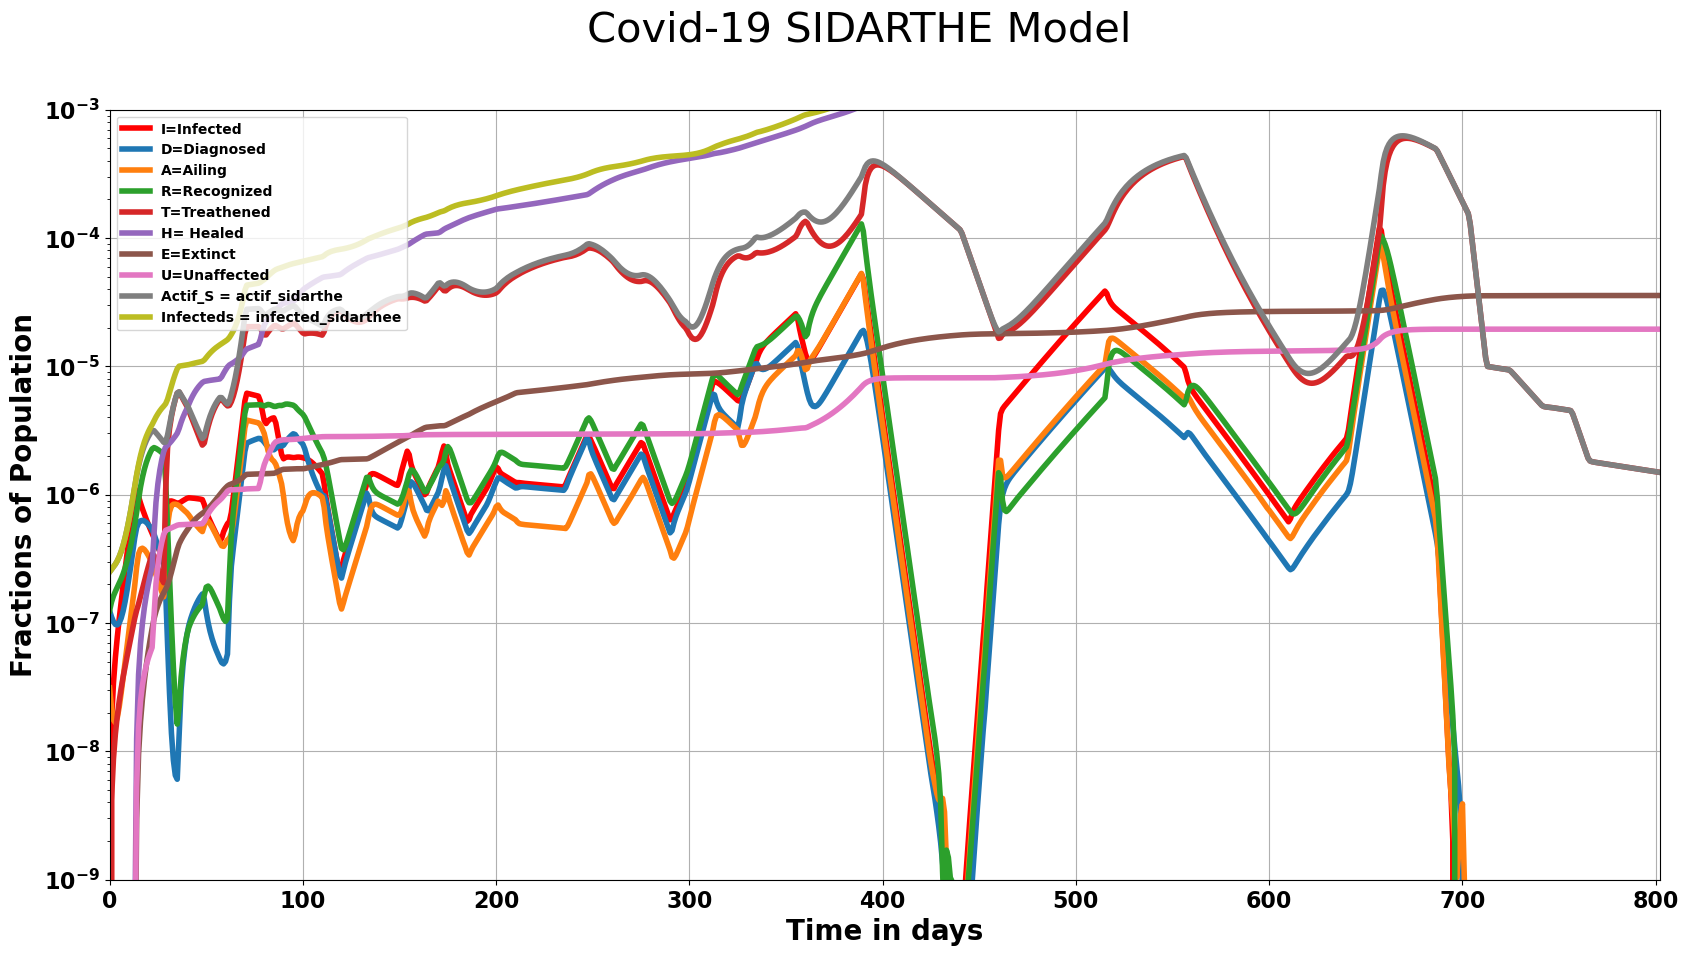

In [16]:
#Model

fig = plt.figure()
ax = plt.subplot(111)
plt.yscale('log')
#plt.yscale('linear')
#plt.plot(t, S, label='S=Succeptible',linewidth=4) 
plt.plot(t, I, 'r',label='I=Infected',linewidth=4)
plt.plot(t, D,label='D=Diagnosed',linewidth=4) 
plt.plot(t, A,label='A=Ailing',linewidth=4) 
plt.plot(t, R, label='R=Recognized',linewidth=4)  
plt.plot(t, T, label='T=Treathened',linewidth=4)
plt.plot(t, H,label='H= Healed',linewidth=4) 
plt.plot(t, E,label='E=Extinct',linewidth=4) 
plt.plot(t, U,label='U=Unaffected',linewidth=4)

plt.plot(t, actif_sidarthe,label='Actif_S = actif_sidarthe',linewidth=4) # A[i]+T[i]+R[i] 
plt.plot(t, E+H+actif_sidarthe,label='Infecteds = infected_sidarthee',linewidth=4) #A[i]+T[i]+R[i]+H[i]+E[i]
plt.ylim(10**-9, 10**-3)
plt.xlim(0, Ndays) 
#plt.ylim(0, 7.5*10**-2)    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Linear Scale')
#plt.title('Log Scale')
fig.suptitle('Covid-19 SIDARTHE Model',fontsize=30)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
plt.grid(True)
plt.legend()
ax.legend(loc=2, prop={'size': 10})
#plt.xscale("log")
#plt.yscale("log")
plt.show()
fig.savefig('SIDARTHE_model_variousR08Oct2020LogScaleTogo.png')


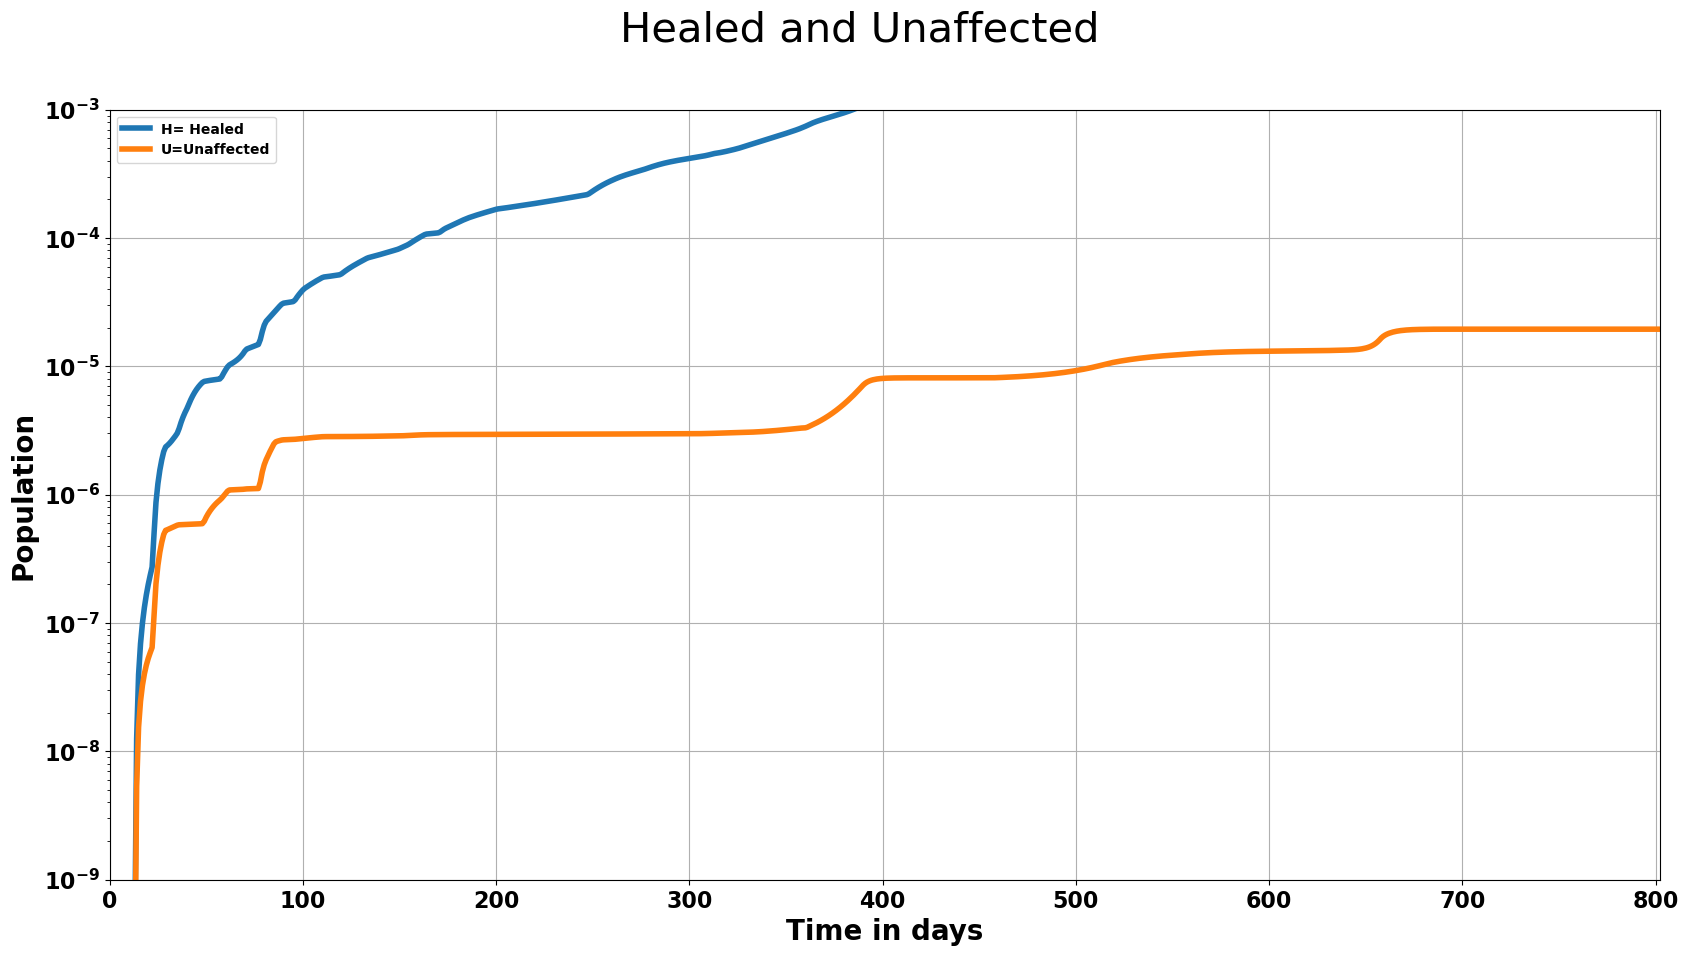

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
plt.yscale('log')

plt.plot(t, H,label='H= Healed',linewidth=4) 

plt.plot(t, U,label='U=Unaffected',linewidth=4)

#plt.plot(t, U/H,label='Ratio=Unaffected/H',linewidth=4)


plt.ylim(10**-9, 10**-3)
plt.xlim(0, Ndays) 
#plt.ylim(0, 7.5*10**-2)    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Linear Scale')
#plt.title('Log Scale')
fig.suptitle('Healed and Unaffected',fontsize=30)
plt.ylabel('Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
plt.grid(True)
plt.legend()
ax.legend(loc=2, prop={'size': 10})
#plt.xscale("log")
#plt.yscale("log")
plt.show()
fig.savefig('SIDARTHE_model_H_U.png')

In [18]:

import csv

TotalNumberofDoses=[]
NumberOfVacinatedPeople=[]
FullyVaccinatedPeople=[]
VaccinatedPeopleDaily=[]
Dates=[]
Percentage=[]
with open('vaccinationcampaineTogo2.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        #else:
        elif (line_count != 0 and line_count<=Ndays-365):            
            Dates.append(row[0])
            TotalNumberofDoses.append(int(row[1]))
            VaccinatedPeopleDaily.append(int(row[2]))
            NumberOfVacinatedPeople.append(int(row[3]))
            FullyVaccinatedPeople.append(int(row[4]))
            Percentage.append(float(row[5])) 
            line_count += 1
    print(f'Processed {line_count} lines.')
    
    
#print(TotalNumberofDoses) 
#print(len(TotalNumberofDoses)) 

#print(VaccinatedPeopleDaily) 
#print(len(VaccinatedPeopleDaily)) 

#print(NumberOfVacinatedPeople) 
#print(len(NumberOfVacinatedPeople)) 

#print(FullyVaccinatedPeople) 
#print(len(FullyVaccinatedPeople)) 

Column names are Date, Total_doses, new_doses, Vaccinated_pop, Fully_vaccinated_pop, %pop, good, Goodness_vaacine
Processed 438 lines.


In [19]:
#date1= ['05/25/2020', '05/26/2020','05/27/2020','05/28/2020','05/29/2020','05/30/2020','05/30/2020','05/31/2020','06/01/2020','06/01/2020']


data_infected = [1,1,1,1,1,1,1,1,1,1,1,1,1, 9, 12, 16, 16,18, 20, 23, 24, 25, 28, 30, 34, 34, 36, 39, 40, 41, 44, 58, 65, 70, 73, 76, 76,
                                 76, 77, 77, 81, 81, 83, 84, 84, 84, 86, 88, 88, 90, 96, 98, 99, 99, 109, 116, 123, 124, 126, 
                                 128, 128, 135, 145, 153, 174, 181, 199, 219, 238, 263, 298, 301, 330, 338, 340, 354, 363, 373, 
                                 381, 386, 391, 395, 422, 428, 433, 442, 443, 445, 452, 465,485,487,495,497,501,522,524,
                 525,530,531,532, 537,544,547,555,561,569,569,576,583,588,591,615,642,643,650,661,667,671,676,680,680,689,
                 695,704, 710,718,720,721,731,740,749,766,774,778,783,790,806,828,839,853, 868, 874,896,908,927,941, 958,961,
                 976,988,1001,1012,1028,1046,1060,1067,1070,1092,1104,1124,1130,1147,1154,1173,1190,1212,
                1239,1275,1277,1295,1309,1326,1341,1365,1390,1396,1400,1416,1434,1443,1457,1477,1488,1493,1513,1528,1537,1548,
                 1555,1572,1578,1595,1608,1640,1659,1666,1669,1683,1701,1707,1722,1736,1743,
                 1749,1759,1784,1809, 1818, 1840, 1854, 1864, 1881,1898, 1907,  1921, 1935,  1940, 1949, 1972, 1983,1996, 2027,
                 2049, 2057, 2071, 2104, 2120, 2139, 2162, 2187, 2200, 2204, 2229, 2238, 2296, 2312, 2331, 2357,2364, 2381, 
                 2406, 2442, 2460, 2483,  2516, 2523, 2558, 2593, 2605, 2627, 2651, 2675, 2693, 2722,  2752, 2771, 2796, 2829,
                 2843, 2854,2872, 2889, 2904, 2926, 2946, 2962, 2974, 2997, 3014, 3039, 3051, 3085, 3095, 3111, 3132, 3151, 3182,
                 3202,3221,3251,3266,3295,3315,3330, 3350,3396, 3416,3436, 3467,3494, 3520, 3546,3555, 3564, 3576,3604, 3611, 
                 3633, 3662, 3683, 3702, 3722, 3770, 3807, 3845, 3894, 3932, 3957, 3978, 4045, 4109, 4165, 4220, 4272, 4302, 
                 4324, 4383,  4459, 4505, 4545, 4636, 4662, 4682, 4765, 4870, 4922, 4975, 5041, 5074, 5092, 5166, 5224, 5290,
                 5356, 5436,5483,5496,5576,5606,5687,5757,5823,5874,5882,5953,6007,6085,6182,6268,6319,6348,6466,6548,6637,6730,
                 6851,6901,6933,7086,7188,7323,7428,7521,7570,75987680,7737,7857,7953,8070,8183,8222,8322,8472,8582,8695,8839,8918,8960,
                 9147,9340,9506,9676,9827,9955,9992,10249,10480,10480,10654,10848,11064,11187,11249,11310,11501,11649,11814,11947,12006,
                 12034,12125,12214,12301,12391,12496,12533,12553,12610,12657,12698,12742,12787,12814,12827,12884,12898,12931,12967,12992,
                 13010,13017,13037,13068,13090,13106,13141,13154,13167,13196,13210,13238,13244,13265,13275,13279,13286,13299,13340,13352,
                 13363,13374,13381,13384,13396,13420,13432,13447,13457,13466,13481,13496,13513,13522,13533,13539,13524,13551,13563,13576,
                 13597,13620,13631,13651,13669,13682,13701,13715,13721,13731,13735,13749,13763,13788,13816,13837,13846,13881,13917,13962,
                 13999,14039,14069,14082,14105,14140,14176,14203,14232,14270,14278,14320,14377,14426,14511,14602,14649,14680,14769,14801,
                 14877,14970,15072,15149,15176,15292,15393,15522,15624,15798,15870,15924,16053,16232,16401,16559,16728,16874,16946,17104,
                 17239,17434,17581,17846,18000,18086,18359,18605,18875,19128,19491,19614,19702,19963,20244,20517,20698,21037,21181,21261,
                 21561,21785,21980,22234,22444,22562,22625,22832,23018,23264,23450,23618,23718,23778,23947,24093,24226,24369,24519,24599,
                 24655,24791,24902,24986,25083,25163,25218,25252,25323,25368,25429,25487,25535,25558,25586,25623,25653,25705,25731,25760,
                 25778,25788,25807,25826,25850 ,25865,25886,25899,25903,25926,25936,25950,25967,25989,25992,26000,26011,26024,26036,26054,
                 26068,26079,26083,26086,26096,26102,26107,26114,26122,26125,26133,26120,26145,26148,26152,26158,26167,26174,26178,26185,
                 26199,26205,26207,26210,26219,26224,26232,26236,26241,26250,26258,26265,26273,26282,26284,26291,26304,26315,26326,26350,
                 26357,26372,26389,26400,26416,26442,26466,26512,26550,26602,26678,26742,26911,27108,27405,
                 27684,27992,28268,28504,28925,29416 ,30163,30673,31165,31390,31691,32067,32515,33031,33553,33915,34216,
                 34385,34658,35097,35425,35665,35851, 35950, 35993,36056,36120,36176,36213,36280,36313,36323, 36372,36421,
                                  36452,36469,36487,36491,36509,36531,36538,36550,36557,36593,36598,36605,36612,36620, 
                                   36630,36634,36650,36660,36688,36693,36704,36710,36724,36738,36747,36755,36764,36771,36777
                                   ,36782,36798,36799,36806,36808,36812,36820,36815,36821,36827,36833, 36838,36843, 36848,36848
                                   ,36850,36854,36860,36860,36869,36870,36871,36876,36878,36882,36886,36896,36902,36907,36911,36917,
                                   36921,36924,36930,36939,36943,36943,36944,36945,36612,36950,36953,  36956,36957,36957,
                                   36961, 36960,36962, 36962,36962,36963,36965,36967,36969,36971,36973,36977,36977,36979,36979,
                                   36981,36983,36985,36988,36989,36991,36988,36989,36991,37000,37002,37006,37009,37012,
                37013,37017,37017,37023,37023,37023,37026,37029,37029,37029]





print(len(data_infected))



#print(len(data_time))

data_recovered  = [0,0,0,0,0,0,0,0,0,0,0,0,0, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 7, 10, 10, 10, 17, 17, 18, 20, 23, 23, 23, 24, 25, 25, 29, 29, 32
                                 , 35, 45, 48, 49, 52, 53, 56, 56, 59, 59, 62, 62, 62, 63, 64, 65, 66, 67, 74, 74, 77, 85, 85,
                                 87, 89, 89, 92, 96, 96, 96, 99, 104, 106, 107, 110, 118, 121, 133, 141, 161, 177, 183, 197, 202
                                 , 206, 211, 215, 230, 236, 239,240,240,248,251,260,265,271,279,291,299,308,344,353,353,361,366,
                                 375,380,384,392,394,395,396,401,401,402,414,424,424,432,447,450,467,475,483,494,506,513,517,
                                 528,534,543,546,548,551,554,560,578,584,585,587,599,607,612,626,634,641,647,660,663,673,690,
                                 697,710,721,729,729,752,782,791,806,836,843,858,868,875,878,891,903,910,914,919,
                                 946,968,981,990,996,1005,1035,1055,1071,1079,1094,1106,1114,1127,1144,1145,1166,1189,1190,1204,1219,1230,1243,1251,1259,1269, 1274,1290,1297,1307, 1312,1319,1330,1336,
              1341,1348,1353, 1365,1375, 1392, 1403, 1410, 1419, 1426, 1433, 1444, 1457, 1461, 1465, 1473, 1489,  1500, 1517, 1531, 1541, 
              1555, 1561, 1574, 1586, 1591, 1600, 1608, 1612, 1620, 1627,1640, 1660, 1676, 1681, 1691, 1699,1708, 1720, 1727,  1732,
              1736, 1763, 1792, 1815, 1856, 1885, 1920, 1952,  2006, 2058, 2101, 2148, 2209, 2248, 2274, 2295, 2320, 2345
              , 2401, 2435, 2464, 2478, 2515, 2543, 2567, 2599, 2624,2653, 2677, 2691, 2699,2714, 2726,2745,2789,2821, 2852,2890,2933, 2974,3017, 3054, 3091,3131, 3186, 3225,3261,3301,
              3315, 3336, 3384, 3393, 3443, 3457, 3474, 3479, 3515, 3544, 3560, 3581, 3602, 3614, 3638, 3656, 3683, 3704, 3731, 3763,
              3775,  3785, 3839, 3865, 3901, 3927, 3976, 3997, 4005, 4068, 4092, 4122, 4177, 4224, 4268, 4282, 4352, 4380, 4418,
              4456,4535,4550,4561,4630,4696,4789,4899,4949,5004,5007,5094,5146,5179,5236,5296,5314,5323,5388,5447,5489,5522,5599,5660,5663,5812,5918,6069,6173,6258,6306,6340,
                   6460,6534,6601,6675,6694,6787,6813,6940,7026,7078,7131,7193,7225,7242,7341,7400,7466,7567,7699,7732,7770,
                   7815,7903 ,7903,7996,8096,8201,8288,8348,8368,8592,8797,8985,9190,9274,9303,9464,9543,9791,9970,10163,
                   10208,10230,10350,10431,10512,10614,10699,10755,10781,10927,10949,11045,11140,11249,11269,11281,11306,
                   11385,11508,11580,11657,11691,11694,11776,11807,11834,11847,11882,11897,11901,11950,12013,12083,12142,
                   12222,12278,12330,12405,12484,12572,12644,12737,12808,12868,12950,13032,13105,13161,13248,13249,13250,
                   13265,13275,13286,13294,13301,13308,13316,13324,13334,13338,13353,13355,13358,13362,13379,13388,13402,
                   13441,13465,13489,13506,13513,13517,13522,13531,13535,13536,13572,13586,13608,13623,13646,13656,13669,
                   13721,13746,13766,13792,13817,13838,13852,13895,13907,13944,13986,14026,14069,14102,14191,14272,14338,
                   14385,14450,14493,14524,14592,14654,14722,14785,14857,14872,14898,15035,15165,15244,15319,15409,15474,
                   15496,15649,15741,15861,15945,16054,16105,16123,16238,16315,16397,16481,16584,16691,16723,16926,17079,
                   17226,17358,17553,17639,17669,17822,18025,18241,18392,18512,18639,18746,18944,19270,19576,19871,20165,
                   20426,20634,20912,21199,21483,21758,22027,22321,22433,22741,22908,23061,23225,23366,23506,23612,23796,
                   23929,24064,24186,24350,24464,24516,24670,24805,24944,25064,25138,25194,25248,25327,25392,25423,25440,
                   25455,25459,25460,25474,25488,25504,25511,25547,25579,25599,25632,25675,25720,25746,25784,25791,25798,
                   25806,25789,25813,25813,25816,25813,25816,25820,25828,25838,25839,25844,25850,25856,25867,25879,25892,
                   25895,25900,25907,25907,25915,25915,25918,25921,25921,25923,25928,25929,25934,25937,25937,25941,25945,
                   25947,25952,25959,25959,25962,25977,25991,25991,26000,26001,26034,26036,26050,26052,26058,26091,26113 ,
                   26134,26167,26190,26209,26219,26321,26435,26643,26806, 27059,27291,
                   27552,27868,28190,28439,28749,28934,29067,29378,29735,30063,30215,30516,30765,30974,31280,31558,31812,32048,32283,32541,32645,
          32897,33116,33345,33562,33799,33899,34002,34112,34223,34334, 34335, 34843,35145,35445,35756,36062,36264,36372,36397,
         36397,36399,36403,36407,36408,36410,36410,36410,36410,36414,36418,36423,36421,36424,36425,36425,36427,36447,36472,
           36494,36520,36542,36542,36542,36542,36542,36542,36542,36553,36565 ,36575,36580,36580,36581,36581,36581,36581,36586,
           36591,36591,36591,36592,36592,36602,36612,36622,36953 , 36650, 36659,36659  ,36659, 36659,36664,36668,36672,36672
           ,36672, 36965,36679,36967,36679,36679,36679,36679,36688,36688,36688,36688,36688,36688,36688,36693,36688,36688,
                  36709,36711,36713,36716,36716,36719,36722,36722,36727,36727,36731,36734,36736,36736,36736]

print(len(data_recovered))

data_dead  = [0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0,0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5,
                                 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12,
                                 12, 12, 12, 12, 12, 12, 13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,
                                 13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15, 15,15,15,15,15,
                                 15,15,15,15,16,16,17,17,18,18,18,18,18,19,19,19,19,19,21,22,22,23,23,25,26,26,26,26,27,27,27,27,
                                 27,27,27,27,27,27,27,27,27,27,27,27,28,28,30,31,31,32,32,
              33,34,36,37,37,37,37,40,40,40, 41,41,41,41,41,41,41,44,44,46,46,47,48,48,48, 48, 48, 49, 49, 49, 49,  49, 49, 49, 50, 51, 51, 51,  51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 53, 54, 54,
                 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,59, 60, 60, 61, 61,  61, 62, 63, 63, 64, 64, 64, 64, 64,64,  64
                 ,  64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66,  66, 66, 68, 68, 68, 68, 68,  68, 68, 68,  68,
                 69, 69, 69, 70, 72, 72, 72,72,72 , 72, 72, 73, 73, 73,  73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 75, 76, 76, 76,
                 76,  76,  77, 77, 79, 79, 79, 79,79,79,79,79,79,79,79,79,79,79,80,80,80,80,80,80,80,81,81,81,81,81,81,
              81,81,81,81,82,82,82,83,84,85,85,85,88,88,90, 92,92,92,92,93,93,95,
              96,96,97,98,102,102,102,104,104,105,105,107,107,107,107,107,109,109,109,110,110,110,112,112,113,113,115,
              116,116,116,116,117,117,117,119,119,119,120,121,121,121,121,121,121,122,122,122,123,123,123,123,123,123,123,
              124,124,124,124,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,
              125,125,125,125,125,125,125,126,126,126,126,126,126,127,127,127,127,128,128,128,128,128,128,128,128,128,129,
              129,130,130,130,131,132,132,132,133,133,133,133,133,134,134,134,137,137,138,138,140,140,142,143,143,146,148,
              148,150,150,152,152,153,154,155,155,156,156,157,159,161,161,162,163,165,165,165,168,170,172,172,172,172,172,
              173,175,175,175,177,180,180,185,185,187,190,193,194,196,197,200,203,203,204,205,205,207,208,209,211,211,213,
              213,215,216,216,216,219,222,226,227,227,228,229,230,233,233,234,234,234,235,235,235,236,236,237,237,238,238,
              238,239,239,240,240,240,240,242,242,242,242,242,242,242,242,242,242,242,243,243,243,243,243,243,243,243,243,
              243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,
              243,243,243,243,243,243,244,244,244,244,245,245,246,246,246,246,246,246,246,246,246 ,248,248,248,250,251,251,
              251,252,253,254,254,258,
             260,261,261,261,261,263,263,264,266,266,266,266,267,267,267,267,267,268,268,268,268,268,268,268,268,269,269,270,
          270,270,270,271,271,271,271,271,271,271,271,271,271,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,
          272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,
          272,272,272,272, 272, 272,272,272,272,272,272,273,273,273,273,273,273,273,273,273,273,273,273,273,
          273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273,273]

print(len(data_dead))
339
406
473
524

data_active = [1,1,1,1,1,1,1,1,1,1,1,1,1, 8, 11, 15, 15,17, 19, 22, 23, 23, 26, 22, 23, 23, 24, 20, 20, 20, 20, 32, 39, 44, 46, 48, 48, 
                                 44, 45, 42, 43, 31, 30, 30, 27, 25, 24, 26, 23, 25, 28, 30, 31, 30, 38, 42, 48, 48, 43, 45, 
                                 42, 41, 50, 57, 74, 81, 96, 112, 131, 156, 188, 186, 212, 219, 218, 224, 230, 228, 228, 212,
                                 201, 199, 212, 213, 214, 218, 215, 202, 203, 213,232,234,234,233,228,244,240,233,226,219,211,
                                 180,178,181,181,182,181,176,179,177,180,182,205,227,228,234,223,229,233,229,218,215,207,205,
                                 206, 201,197,192,189,188,191,191,205,211,212,214,215,212,228,237,249,251,249,266,264, 275,281,
                                 292,282,294,296,290,293,296,302,308,313,292,284,287,292,267,277,269,278,288,307,321,345,340,354,363,353,
            346,357,373,373,367,353,349,341,347,351,350,346,352,348,355,345,329,345,334, 336, 338,334,348,359,356,354,352,363,356,366,371,367,366,370, 388,408, 405,417, 
        414, 413, 422, 430, 432, 439,442, 434,439, 457, 459,456, 476, 481, 475, 479, 498,508, 513, 524, 544, 548, 543 , 563, 564,614,617, 614, 624, 626,  633,650,677,683,699, 727, 730,  738, 742, 730, 711,705, 680,647, 631, 607, 584, 556, 531, 516, 513, 505, 495, 461, 447,434, 432, 418, 406, 407, 387,  396, 377,369, 376,387, 402,410, 410,414,411,408,397,374, 351,356,333, 
           316, 310, 295,266, 253,226, 195, 193,170, 159,172, 151, 158, 160, 174, 186, 193, 213, 241, 258, 271, 267, 316, 353, 388, 416, 436,
               454, 465, 470, 520, 530, 544, 586, 590, 601, 621, 702, 724, 722, 740,  729, 731, 735, 765, 793,821,
               822,853,855,866,830,818,778,794,789,794,778,780,825,865,891,924,944,997,1019,1066,1126,1169,1157,1185,1189,
               1185,1166,1167,1173,1172,1166,1128,1111,1163,1185,1281,1300,1313,1285,1349,1402,1462,1544,1589,1614,1701,1835,1933,2002,2021,
               2116,2115,2325,2468,2468,2548,2642,2753,2787,2789,2829,2796,2737,2713,2641,2616,2615,2544,2554,2393,2302,2214,2206,2203,
               2139,2105,2065,2007,1967,1938,1924,1835,1827,1763,1704,1620,1618,1613,1608,1560,1458,1402,1360,1339,1348,1295,1278,1279
               ,1258,1253,1253,1211,1161,1132,1085,1016,971,926,854,787,723,663,585,524,473,406,339,283,236,160,165,167,161,162,164,177,
               193,197,209,218,221,236,235,238,245,245,242,247,258,247,244,229,246,275,315,347,378,403,414,401,422,435,447,453,481,476,
               466,497,526,582,648,673,690,734,754,791,841,903,934,926,953,971,1034,1087,1196,1224,1246,1306,1423,1523,1618,1714,1843,
               1887,1908,1912,2027,2097,2272,2361,2422,2540,2692,2842,3011,3265,3337,3406,3550,3754,3945,4040,4273,4310,4353,4450,4519,
               4564,4683,4697,4727,4759,4810,4790,4820,4854,4901,4874,4825,4795,4614,4439,4287,4141,3960,3806,3663,3487,3287,3106,2914,
               2671,2592,2355,2232,2139,2032,1936,1819,1740,1593,1490,1406,1310,1175,1078,1036,900,784,668,563,510,466,416,359,304,287,
               287,294,291,298,295,294,290,301,279,258,242,212,178,139,118,87,88,84,84,88,89,92,93,99,108,111,107,104,117,118,114,111,109
               ,102,97,98,100,100,108,107,115,121,120,127,138,144,154,173,177,192,205,212,226,247,263,309,344,381,442,506,665,861,1125,
               1402,1696,1970,2200,2588,3057 ,3781,4258,4727,4931,5221,5495,5829,6239,6658,6856,6903,6840,6852,
              6969,6974,6965,6841,6755,6663,6415,6121,5847,5732,5498,5282,5082,4825,4596,4373,4154,3936,3682,3596,
                           3366,3154,2937,2732,2526,2430,2334,2230,2127, 2026,1729, 1536,1244,972,666,371,175,81,70,79,84,89,
                            92,97,100,116, 117,124,122,122,125,122,125,130,136,139,124,104,84,62,46,46,46,55,56,57,62,53,45,39
                            ,44,50,54,58,64,68,66,67,76,80,79,80,71,62,56,49 ,34 ,26,26, 26,25,29,21,17,17,18,13,15,17,19,
                            21,25,16,18,18,20,22,24,27,28,25,27,28, 18,18,20,20,23,21,22,22,23,23,19,19,20,20,20] 

print(len(data_active))




Goodness=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,          
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,          
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1]
print(len(Goodness)) 


#print(data_active[451])
#print(data_active[450])
#print(data_active[449])
#print(data_active[448])
#len(data_active)
#for i in range(len(data_active)):
#    print(i,data_active[i])

#print(Dactifs)
#print(Ddeads)
#print(Dinfecteds)
#print(Drecovereds)

802
802
802
802
802


In [20]:
dados=pd.read_csv("vaccinationcampaineTogo2.csv")

In [21]:
print(data_infected[364],data_infected[365], data_infected[366], data_infected[367])

7570 75987680 7737 7857


In [22]:
data_infected[365]=7598

In [23]:
data_infected[365]

7598

In [24]:
del data_infected[Ndays:]
#del data_time[150:]
del data_active[Ndays:]
del data_dead[Ndays:]
del data_recovered[Ndays:]


N=8e6
Dactifs=[]
Ddeads=[]
Drecovereds=[]
Dinfecteds=[]
Vaccinated=[]
FullyVaccinated=[]

for i in data_active:
    Dactifs.append(i/N)
    
for i in data_infected:
    Dinfecteds.append(i/N)    

for i in data_dead:
    Ddeads.append(i/N) 

for i in data_recovered:
    Drecovereds.append(i/N)

len( data_infected) 

for i in range(len(TotalNumberofDoses)):
    Vaccinated.append(NumberOfVacinatedPeople[i]/N)
    FullyVaccinated.append(FullyVaccinatedPeople[i]/N) 


In [25]:
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_dead1=[]
error_actif1=[]
error_recovered1=[]
for i in range(len(t)):
        error_dead1.append(np.sqrt((Ddeads[i]-E[i])**2))
        error_actif1.append(np.sqrt((Dactifs[i]-actif_sidarthe[i])**2))
        error_recovered1.append(np.sqrt((Drecovereds[i]-H[i])**2))
#print(error_dead)
#len(error_dead)

In [26]:
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_dead=[]
error_actif=[]
error_recovered=[]
error_total_case=[]
error_FullyVaccinated=[]
error_Vaccinated=[]

for i in data_active:
    error_actif.append(np.sqrt(i)/N)
    
for i in data_infected:
    error_total_case.append(np.sqrt(i)/N)   

for i in data_dead:
    error_dead.append(np.sqrt(i)/N)

for i in data_recovered:
    error_recovered.append(np.sqrt(i)/N)
    
for i in FullyVaccinated:
    error_FullyVaccinated.append(np.sqrt(i/N))


for i in Vaccinated:
    error_Vaccinated.append(np.sqrt(i/N))
    

In [27]:
ratio_actif=[]
for i in range(Ndays):
    ratio_actif.append(data_active[i]/actif_sidarthe[i])

#print(H)
#print(ratio_actif)    

In [28]:
#H

In [29]:
#R0*sum(lambda*I )/Nhealed

#s1=0
#for i in range(184):
#    s1=s1+U[i]
#np.seterr(divide='ignore', invalid='ignore')

#s=sum(U)  #U=unaffected
#N_Healed= sum(data_recovered)
#N_active=sum(data_active)


error_R0stat=[]
Totalerror_R0=[]

error_R0syst1=[]
error_R0stat1=[]
Totalerror_R01=[]

R0=[]

for i in range(Ndays):
    R0.append(Rzero[i])

f=1
t=[]
Ratio_U_H=[]

for i in range(Ndays):
    t.append(i)
    if(data_recovered[i]>0 and data_active[i]>0 ):
        error_R0stat.append(R0[i]*(1/np.sqrt(data_recovered[i])+1/np.sqrt(data_active[i])))
        
    elif(data_recovered[i]>0 and data_active[i]==0 ):
        error_R0stat.append(R0[i]*1/np.sqrt(data_recovered[i]))
                                   
    elif(data_recovered[i]==0 and data_active[i]>0):
        error_R0stat.append(R0[i]*1/np.sqrt(data_active[i]))                                  
    else:
        error_R0stat.append(f) 
    
        
for i in range(Ndays):
    if(H[i]>0):
        error_R0syst1.append(R0[i]*U[i]/H[i])
        Ratio_U_H.append(U[i]/H[i])
    else:
        error_R0syst1.append(f)
        Ratio_U_H.append(f)

error_R0stat[13]=  error_R0stat[12] 
error_R0syst1[13]= error_R0syst1[14]        
        
for i in range(Ndays):
    Totalerror_R0.append(np.sqrt(error_R0syst1[i]**2 + error_R0stat[i]**2))
 #   print(i,Totalerror_R0)

Rzero_minusT=[]
Rzero_plusT=[]

Rzero_minus_stat=[]
Rzero_plus_stat=[]

Rzero_minus_syst=[]
Rzero_plus_syst=[]

for i in range(Ndays):
    Rzero_minusT.append(R0[i]-Totalerror_R0[i])
    Rzero_plusT.append(R0[i] + Totalerror_R0[i])
    
    Rzero_minus_stat.append(R0[i]-error_R0stat[i])
    Rzero_plus_stat.append(R0[i] + error_R0stat[i])
    
    Rzero_minus_syst.append(R0[i]-error_R0syst1[i])
    Rzero_plus_syst.append(R0[i] + error_R0syst1[i])


 #print(error_R0stat)
#Totalerror_R0                                
#Rzero_minus     
#len(data_recovered)
#len(Totalerror_R0)
#Rzero_minus_syst

#print(Ratio_U_H)
#plt.plot(t, Ratio_U_H)


#print(error_R0syst1, )

In [30]:
rateHealed=[]
f=0
for i in range(Ndays):
    if(H[i]*H[i-1]>0):
        rateHealed.append((H[i]-H[i-1])/H[i-1])
    else:
        rateHealed.append(f)
#len(rateHealed)        

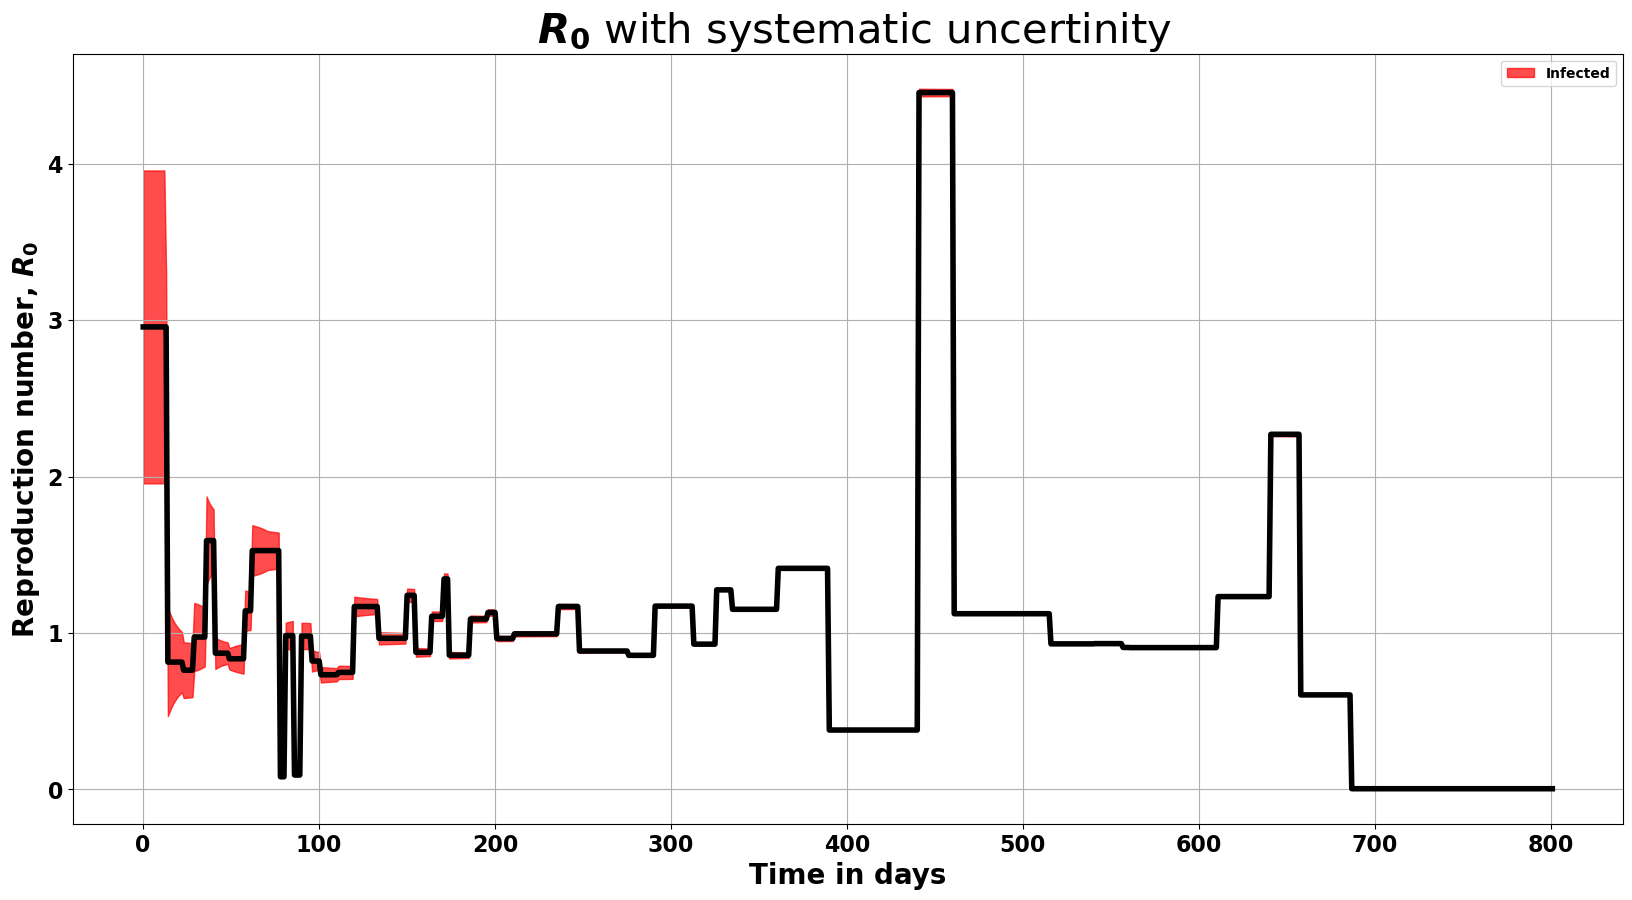

In [31]:
alpha=0.7
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.fill_between(t ,Rzero_minus_syst,Rzero_plus_syst,color='r',alpha=alpha,label='Infected')
plt.plot(t,R0,'k', lw=4) # plotting t, c separately
#plt.ylim(0, 6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlim(0, 184) 
plt.title(' $R_0$ with systematic uncertinity',fontsize=30)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Reproduction number, $R_0$",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('R0Variaton8Oct2020LogScaleTogo_withSystuncertinity.png') #Put your country where I put SA

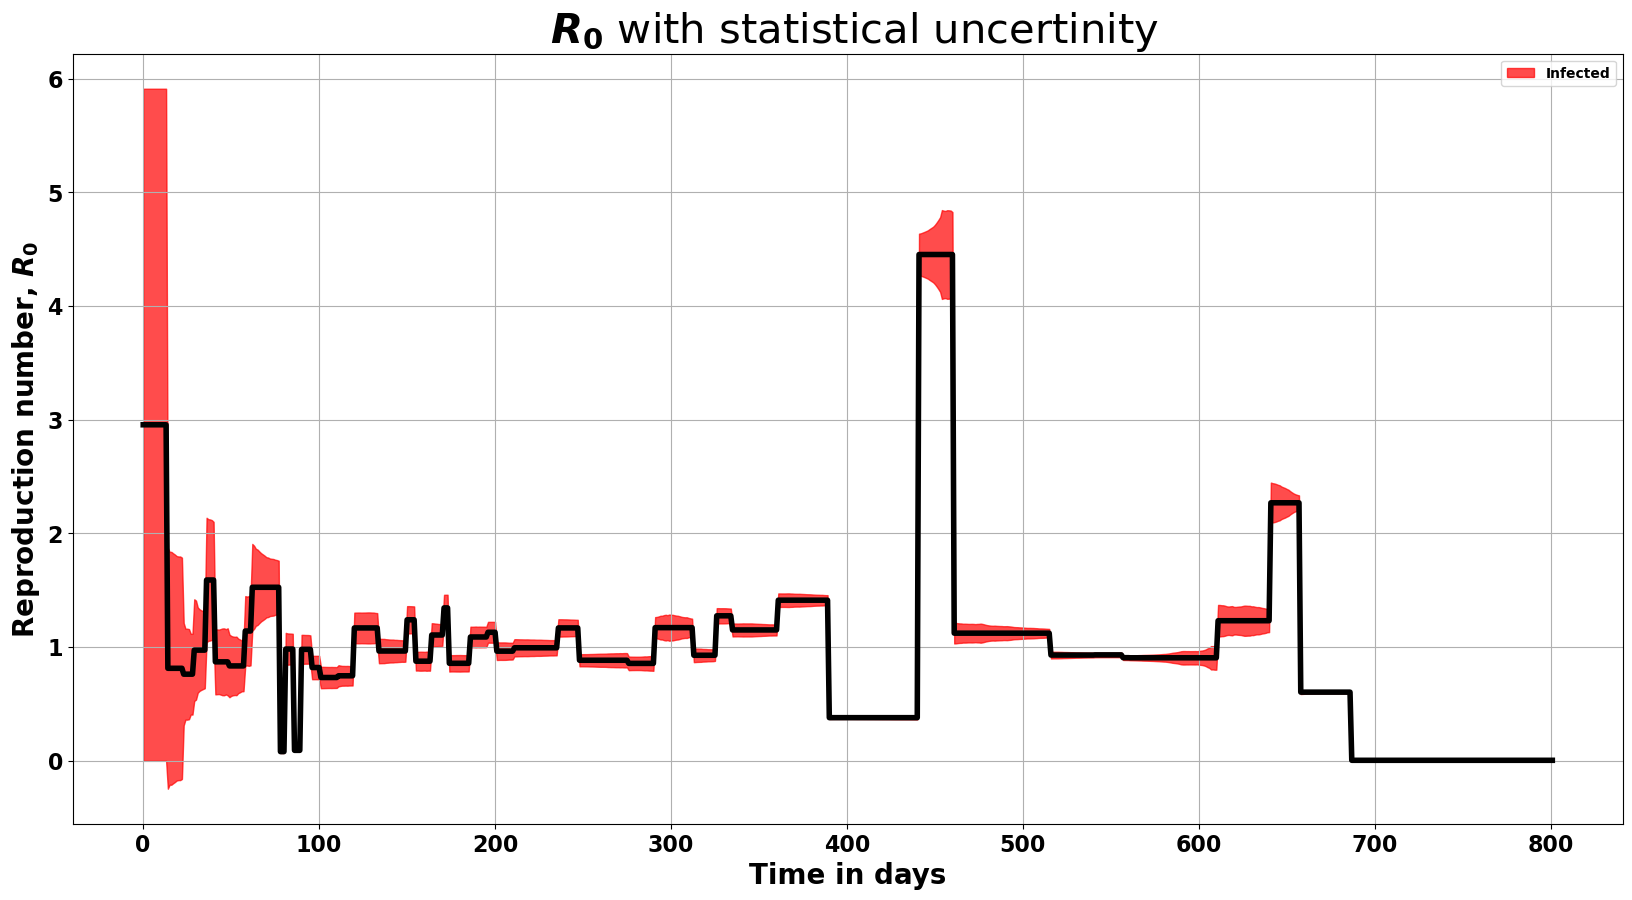

In [32]:
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.fill_between(t ,Rzero_minus_stat,Rzero_plus_stat,color='r',alpha=alpha,label='Infected')
plt.plot(t,R0,'k', lw=4) # plotting t, c separately
#plt.ylim(0, 6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlim(0, 184) 
plt.title(' $R_0$ with statistical uncertinity',fontsize=30)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Reproduction number, $R_0$",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('R0Variaton8Oct2020LogScaleTogo_withStatuncertinity.png') #Put your country where I put SA

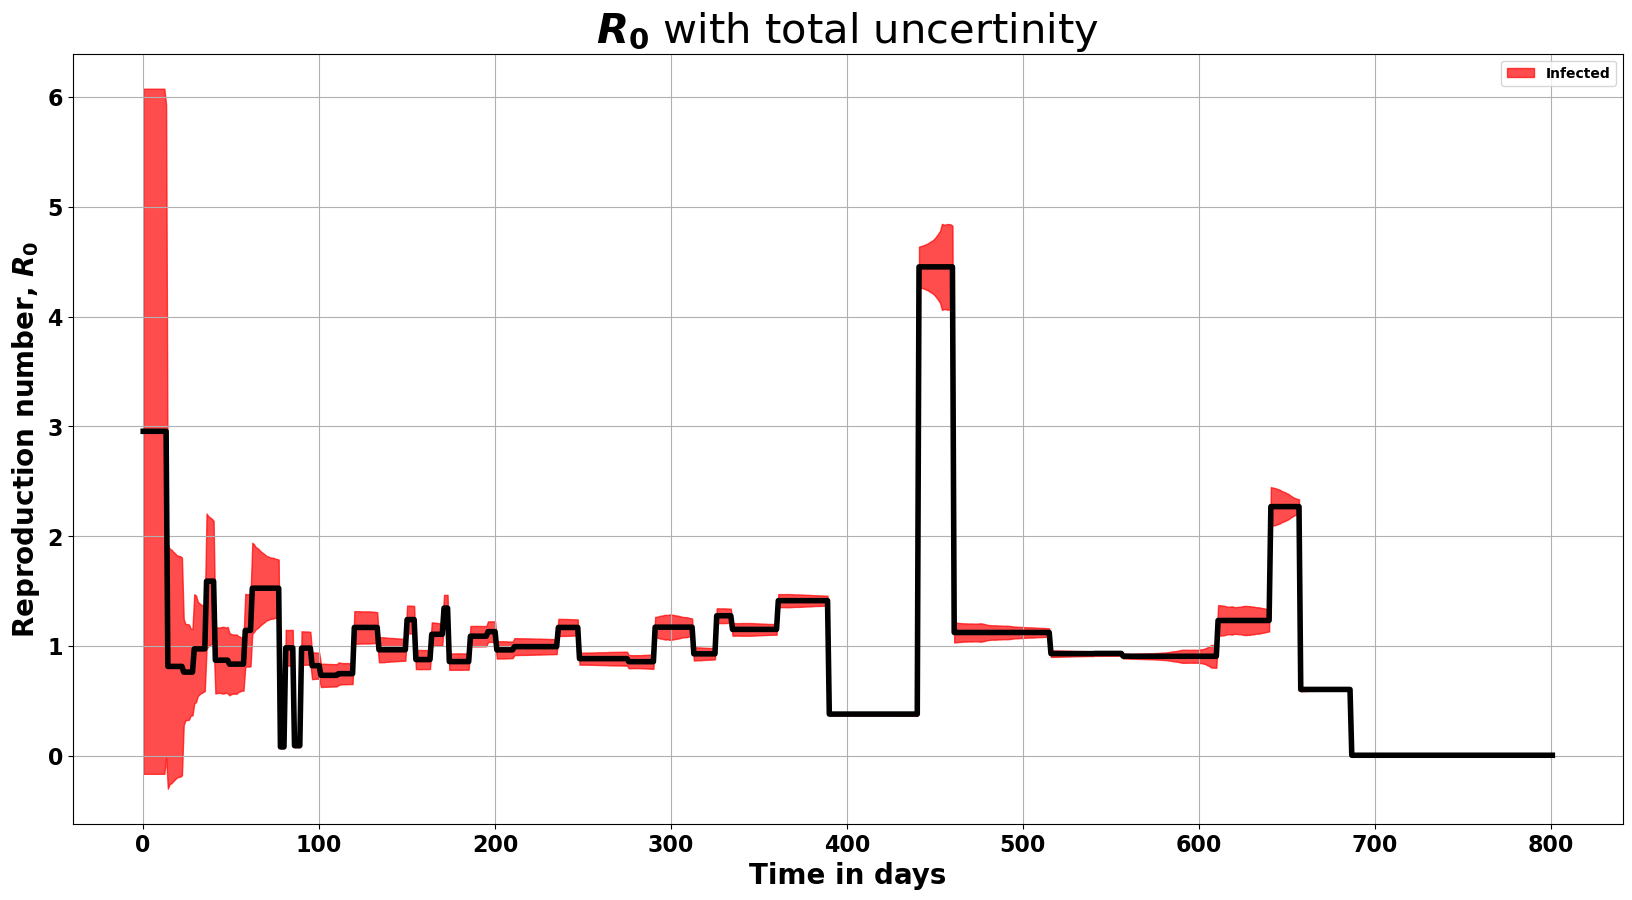

In [33]:
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.fill_between(t ,Rzero_minusT,Rzero_plusT,color='r',alpha=alpha,label='Infected')
plt.plot(t,R0,'k', lw=4) # plotting t, c separately
#plt.ylim(0, 6)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlim(0, 184) 
plt.title('$R_0$ with total uncertinity',fontsize=30)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Reproduction number, $R_0$",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('R0Variaton8Oct2020LogScaleTogo_withTotaluncertinity.png') #Put your country where I put SA

In [34]:
#actif_sidarthe

In [35]:
#actif_sidarthe[315]

In [36]:
Dactifm=[]
Ddeadm=[]
Drecoveredm=[]
Dinfectedm=[]

Dactifp=[]
Ddeadp=[]
Drecoveredp=[]
Dinfectedp=[]

for i in range(Ndays):
    Dactifm.append(Dactifs[i]-error_actif[i])
    Dinfectedm.append(Dinfecteds[i]-error_total_case[i])    
    Ddeadm.append(Ddeads[i]-error_dead[i]) 
    Drecoveredm.append(Drecovereds[i]-error_recovered[i])
    
    Dactifp.append(Dactifs[i]+error_actif[i])
    Dinfectedp.append(Dinfecteds[i]+error_total_case[i])    
    Ddeadp.append(Ddeads[i]+error_dead[i]) 
    Drecoveredp.append(Drecovereds[i]+error_recovered[i])    

    
len(Drecoveredm) 

#print(Drecovereds)

802

In [37]:
for i in range(1,Ndays):
    print(i,actif_sidarthe[i],Dactifs[i])

1 2.61800707001425e-07 1.25e-07
2 2.737168470519578e-07 1.25e-07
3 2.8773353626578826e-07 1.25e-07
4 3.057234306618703e-07 1.25e-07
5 3.296663989658532e-07 1.25e-07
6 3.614683278897295e-07 1.25e-07
7 4.0365854248336656e-07 1.25e-07
8 4.5980959870135144e-07 1.25e-07
9 5.353087563141803e-07 1.25e-07
10 6.347857879408341e-07 1.25e-07
11 7.637776931979487e-07 1.25e-07
12 9.356946721086274e-07 1.25e-07
13 1.1535606508708075e-06 1e-06
14 1.4116311721525423e-06 1.375e-06
15 1.6732662951288927e-06 1.875e-06
16 1.9336631810610422e-06 1.875e-06
17 2.1827601181414757e-06 2.125e-06
18 2.4158366488118703e-06 2.375e-06
19 2.629946489092065e-06 2.75e-06
20 2.824230438521703e-06 2.875e-06
21 2.999099142459148e-06 2.875e-06
22 3.153676726792885e-06 3.25e-06
23 3.159456608083809e-06 2.75e-06
24 3.0377153431131556e-06 2.875e-06
25 2.916738421562464e-06 2.875e-06
26 2.7964998550917585e-06 3e-06
27 2.6775141514714437e-06 2.5e-06
28 2.5598780266907125e-06 2.5e-06
29 2.569449383620807e-06 2.5e-06
30 2.920081

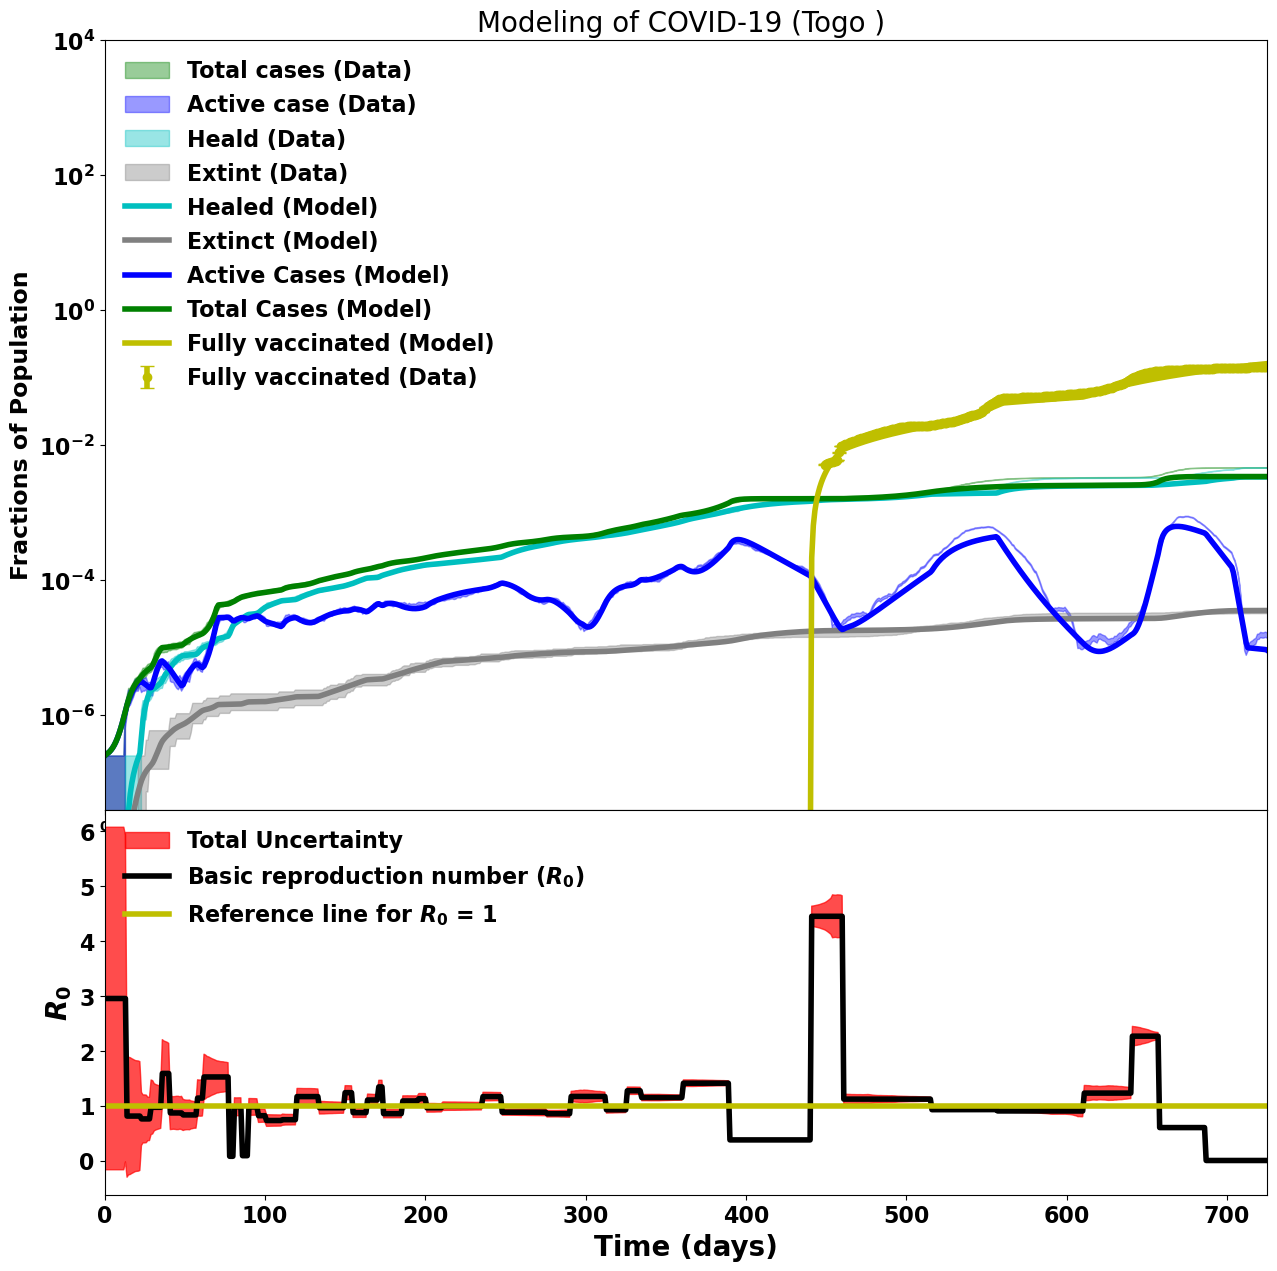

In [38]:
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax0=plt.subplot(gs[0])
ax0.set_yscale('log')


alpha=0.4

plt.fill_between(t ,Dinfectedm,Dinfectedp,color='g',alpha=alpha,label='Total cases (Data)')
plt.fill_between(t ,Dactifm,Dactifp,color='b',alpha=alpha,label='Active case (Data)')
plt.fill_between(t ,Drecoveredm,Drecoveredp,color='c',alpha=alpha,label='Heald (Data)')
plt.fill_between(t ,Ddeadm,Ddeadp,color='gray',alpha=alpha,label='Extint (Data)')

plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, Infected_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)

#plt.plot(t1, V[t1],'y',label='fully_vaccinated (Model)',linewidth=4) # plotting t, b separately 

#plt.plot(tp, Vaccinated,'ko',label='Vaccinated',linewidth=4) # plotting t, c separately 
#plt.plot(tp, FullyVaccinated,'yo',label='Vacinated fully',linewidth=4) # plotting t, c separately


plt.plot(t3, V[t3],'y',label='Fully vaccinated (Model)',linewidth=4)
#plt.plot(t3, V[t3],'y',linewidth=4)
#plt.errorbar(tp ,Vaccinated,yerr=error_Vaccinated,fmt='o', color='red',label='Vaccinated (Data)',elinewidth=4,capsize=5)
plt.errorbar(tp,FullyVaccinated,yerr=error_FullyVaccinated,fmt='o', color='y',label='Fully vaccinated (Data)',elinewidth=4,capsize=5)

#plt.axvline(349)
#plt.axvline(499)
#plt.axvline(583)


#plt.text(349, 1000, 'Sinopharm', fontsize=17)
#plt.text(500, 1000, 'AstraZeneca\n Sinopharm', fontsize=17)
#plt.text(588, 10, 'Johnson&Johnson\nAstraZeneca\nSinopharm', fontsize=17)
#plt.title("Togo vaccination",fontsize=25)
plt.legend()
ax.legend(loc=2, prop={'size': 14})


#plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=17)

plt.title('Modeling of COVID-19 (Togo ) ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 17})


plt.yscale('log')
plt.ylim(4*10**-8, 10**4)
#plt.grid(True)
plt.xlim(0, 725)
plt.legend(loc='upper left',prop={'size':14})
plt.savefig("Modeling of Covid-19,Togo", dpi=300, bbox_inches='tight')
plt.legend(frameon=False,fontsize=16)


ax1=plt.subplot(gs[1], sharex=ax0)



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size



#plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately 
#plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')

plt.fill_between(t ,Rzero_minusT,Rzero_plusT,color='r',alpha=alpha,label='Total Uncertainty')
#plt.plot(t,R0,'k',label='$R_{0}(t)=$reproduction number', lw=4) # plotting t, c separately
plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4)
plt.plot(t,Goodness,'y',linewidth=4,label='Reference line for $R_0$ = 1 ')
#plt.xlim(0, Ndays+10)
#plt.ylim(0,6.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})
plt.xlim(0, 725)

#plt.axvline(349)
#plt.axvline(499)
#plt.axvline(583)
#plt.xscale("log")
#plt.yscale("log")
plt.grid(False)
plt.subplots_adjust(hspace=.0)
plt.legend(frameon=False, fontsize=16)
plt.savefig("ModelingTOG", dpi=300, bbox_inches='tight')




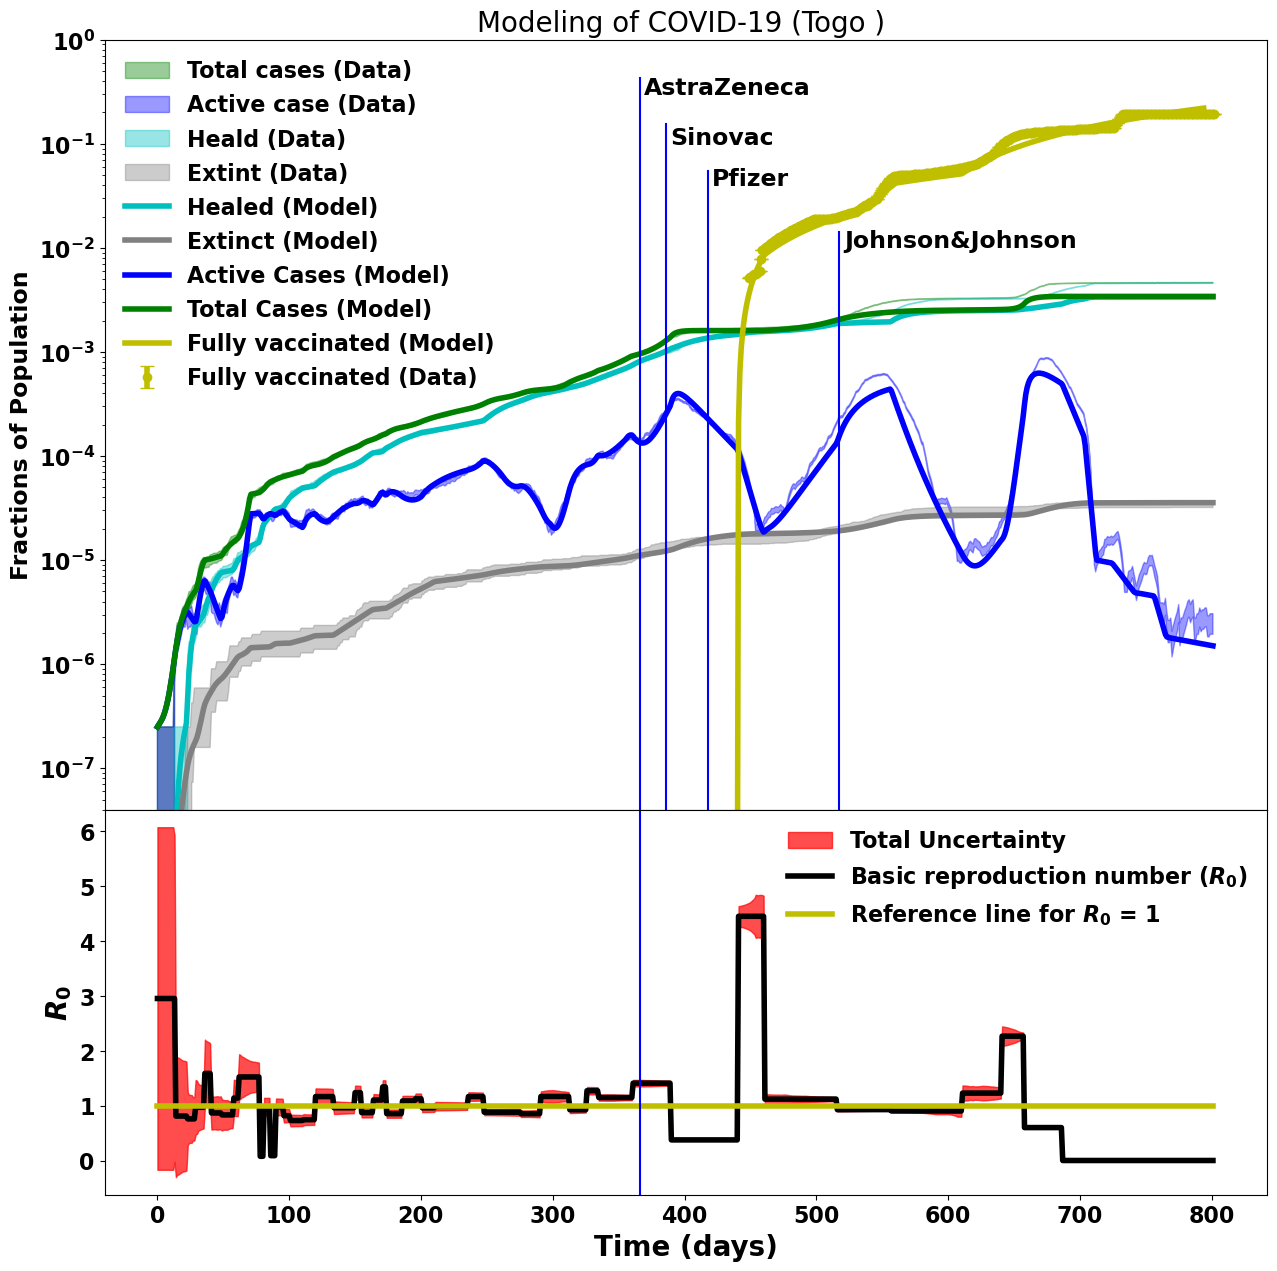

In [39]:
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax0=plt.subplot(gs[0])
ax0.set_yscale('log')


alpha=0.4

plt.fill_between(t ,Dinfectedm,Dinfectedp,color='g',alpha=alpha,label='Total cases (Data)')
plt.fill_between(t ,Dactifm,Dactifp,color='b',alpha=alpha,label='Active case (Data)')
plt.fill_between(t ,Drecoveredm,Drecoveredp,color='c',alpha=alpha,label='Heald (Data)')
plt.fill_between(t ,Ddeadm,Ddeadp,color='gray',alpha=alpha,label='Extint (Data)')

plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, Infected_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)

#plt.plot(t1, V[t1],'y',label='fully_vaccinated (Model)',linewidth=4) # plotting t, b separately

#plt.plot(tp, Vaccinated,'ko',label='Vaccinated',linewidth=4) # plotting t, c separately
#plt.plot(tp, FullyVaccinated,'yo',label='Vacinated fully',linewidth=4) # plotting t, c separately


plt.plot(t3, V[t3],'y',label='Fully vaccinated (Model)',linewidth=4)
#plt.plot(t3, V[t3],'y',linewidth=4)
#plt.errorbar(tp ,Vaccinated,yerr=error_Vaccinated,fmt='o', color='red',label='Vaccinated (Data)',elinewidth=4,capsize=5)
plt.errorbar(tp,FullyVaccinated,yerr=error_FullyVaccinated,fmt='o', color='y',label='Fully vaccinated (Data)',elinewidth=4,capsize=5)

plt.axvline(366, ymax= .95,c='b')
plt.axvline(386, ymax= .89,c='b')
plt.axvline(418, ymax= .83,c='b')
plt.axvline(517, ymax= .75,c='b')
plt.text(369, 0.3, 'AstraZeneca', fontsize=17)
plt.text(389, 0.099, 'Sinovac', fontsize=17)
plt.text(421, 0.04, 'Pfizer', fontsize=17)
plt.text(521, 0.01, 'Johnson&Johnson', fontsize=17)

plt.legend()
ax.legend(loc=2, prop={'size': 15})


#plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=17)

plt.title('Modeling of COVID-19 (Togo ) ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 17})


plt.yscale('log')
plt.ylim(4*10**-8, 10**0)
#plt.grid(True)
#plt.ylim(0, 2*10**-4)
plt.legend(loc='upper left',prop={'size':14})
plt.savefig("Modeling of Covid-19,Togo", dpi=300, bbox_inches='tight')
plt.legend(frameon=False,fontsize=16)


ax1=plt.subplot(gs[1], sharex=ax0)



alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size



#plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4) # plotting t, c separately
#plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='Total uncertainty')

plt.fill_between(t ,Rzero_minusT,Rzero_plusT,color='r',alpha=alpha,label='Total Uncertainty')
#plt.plot(t,R0,'k',label='$R_{0}(t)=$reproduction number', lw=4) # plotting t, c separately
plt.plot(t,R0,'black', label='Basic reproduction number ($R_{0}$)',linewidth=4)
plt.plot(t,Goodness,'y',linewidth=4,label='Reference line for $R_0$ = 1 ')
#plt.xlim(0, Ndays+10)
#plt.ylim(0,6.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_0$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})

plt.axvline(366,c='b')


#plt.xscale("log")
#plt.yscale("log")

plt.subplots_adjust(hspace=.0)
plt.legend(frameon=False, fontsize=16)
plt.savefig("ModelingTOG", dpi=300, bbox_inches='tight')


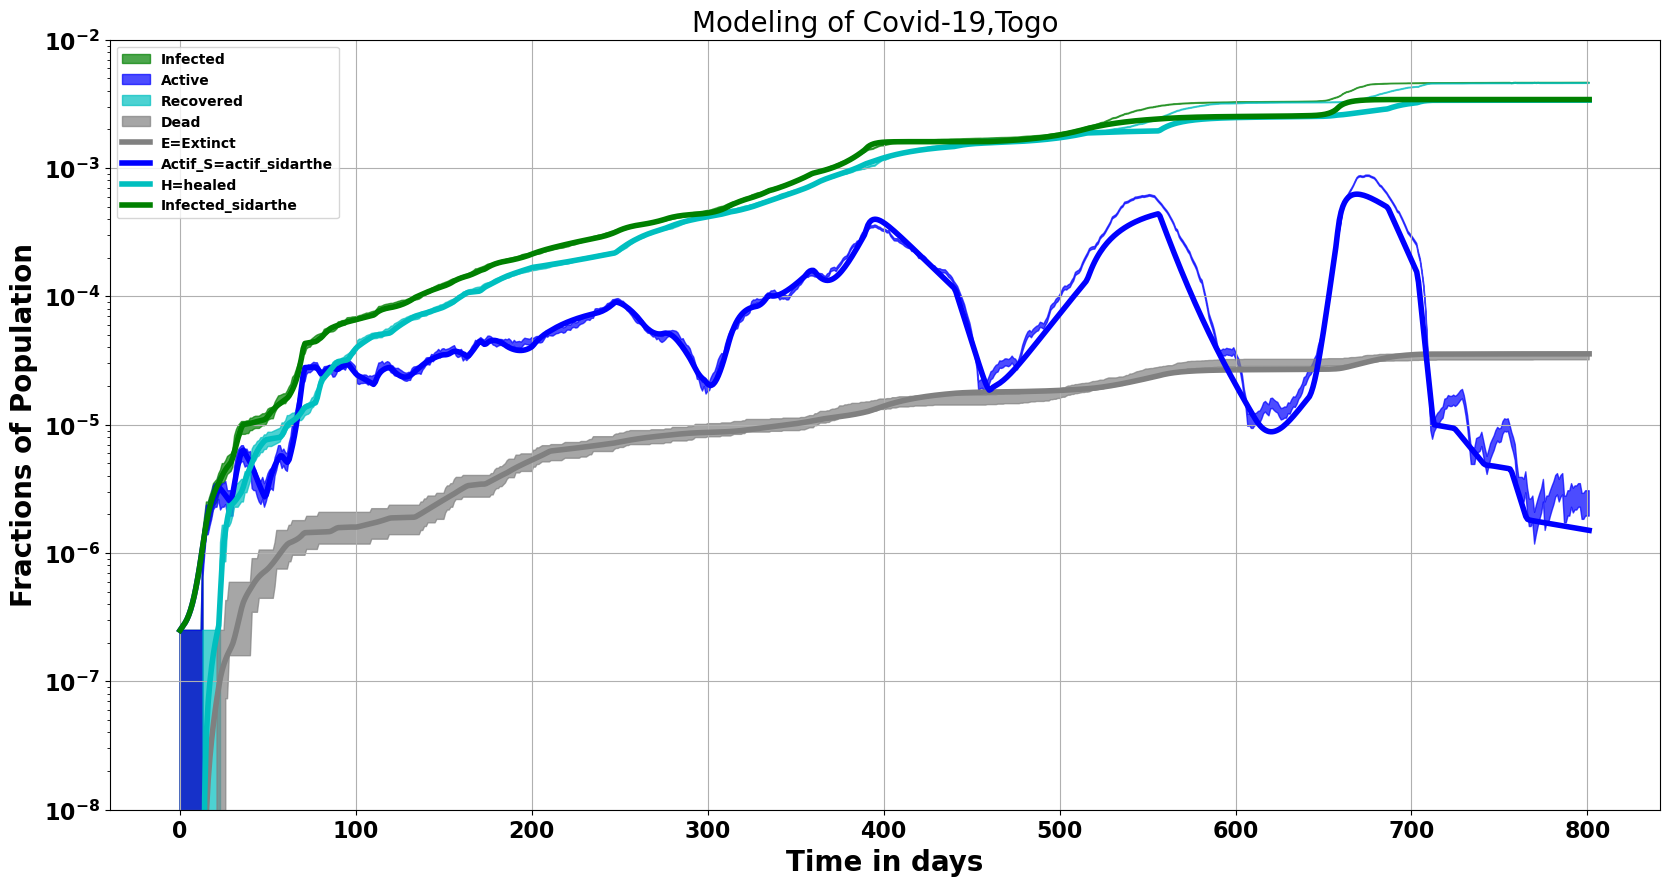

In [40]:
alpha=0.7
#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.fill_between(t ,Dinfectedm,Dinfectedp,color='g',alpha=alpha,label='Infected')
plt.fill_between(t ,Dactifm,Dactifp,color='b',alpha=alpha,label='Active')
plt.fill_between(t ,Drecoveredm,Drecoveredp,color='c',alpha=alpha,label='Recovered')
plt.fill_between(t ,Ddeadm,Ddeadp,color='gray',alpha=alpha,label='Dead')

plt.plot(t, E,'gray',label='E=Extinct',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=4) # plotting t, b separately 
plt.plot(t, E+H+actif_sidarthe, 'g',label='Infected_sidarthe',linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.title('Modeling of Covid-19,Togo  ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

plt.yscale('log')
plt.ylim(10**-8, 10**-2)
plt.grid(True)
#plt.ylim(0, 2*10**-4)

fig.savefig('11 S_model_fitting17112020.png')


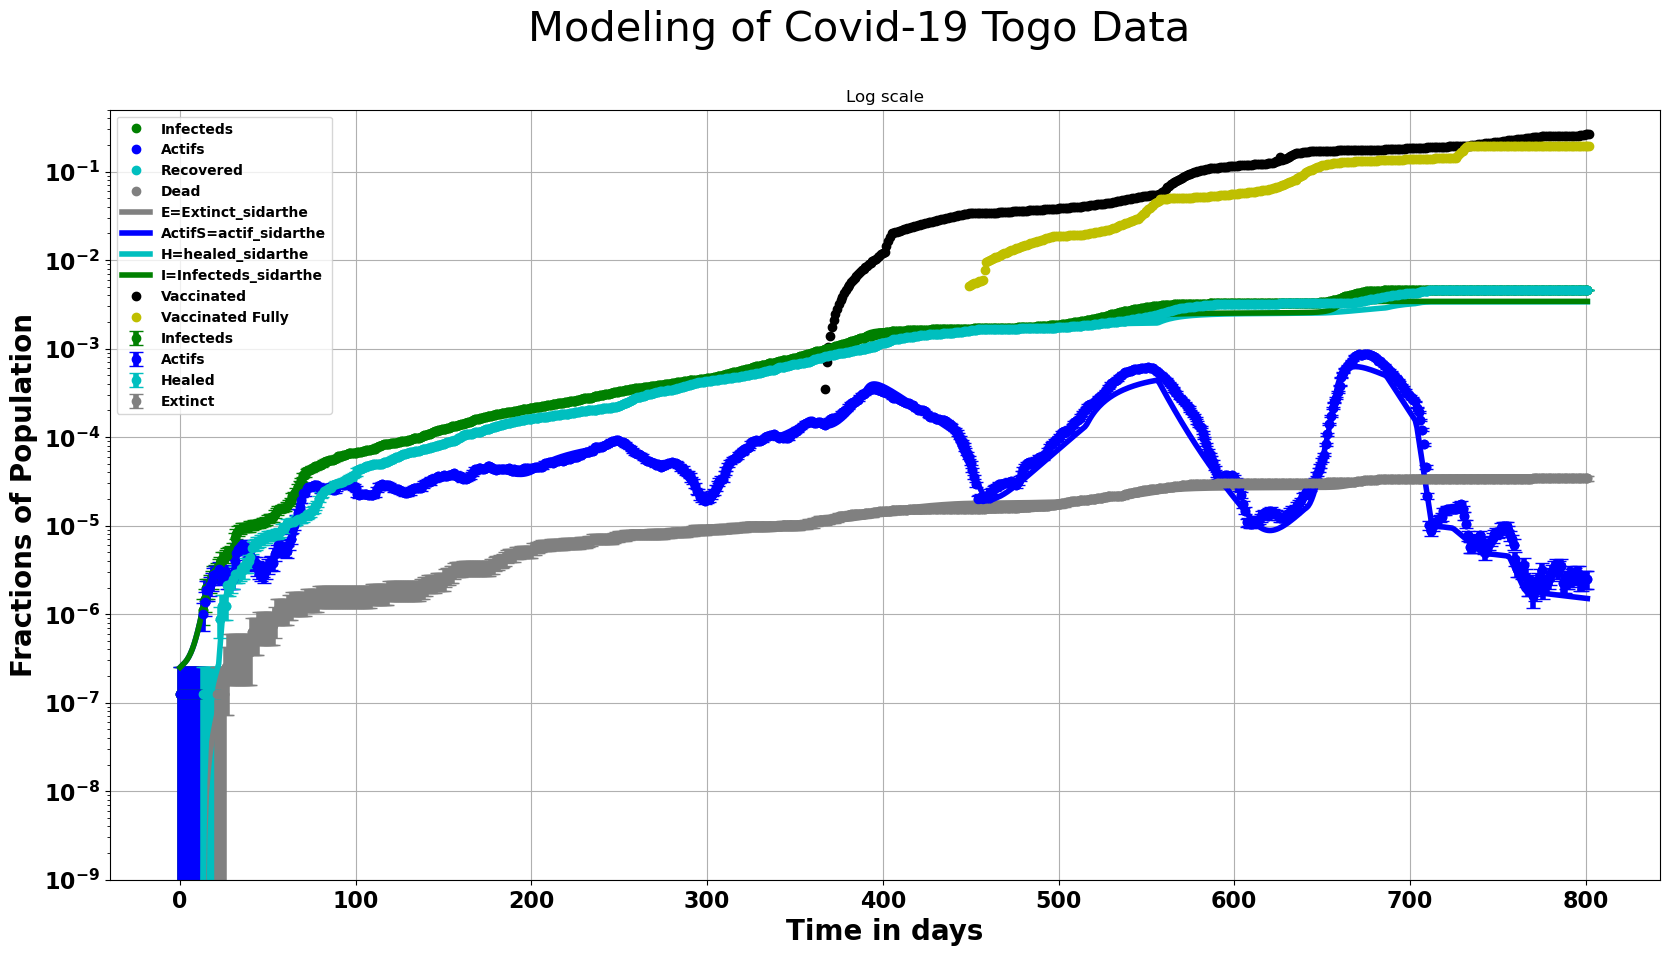

In [41]:

# Plot
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
#ax = plt.subplot(111)



plt.semilogy(t ,Dinfecteds,'o',label='Infecteds',linewidth=2,color='g')
plt.semilogy(t ,Dactifs,'o',label='Actifs',linewidth=2,color='b')
plt.semilogy(t ,Drecovereds,'o',label='Recovered',linewidth=2,color='c')
plt.semilogy(t ,Ddeads,'o',label='Dead',linewidth=2,color='gray')

plt.errorbar(t, Dinfecteds,yerr=error_total_case,fmt='o',color='g',label='Infecteds', elinewidth =4, capsize = 5)
plt.errorbar(t ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actifs', elinewidth =4, capsize = 5)
plt.errorbar(t ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed', elinewidth =4, capsize = 5)
plt.errorbar(t ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct', elinewidth =4, capsize = 5)

plt.plot(t, E,'gray',label='E=Extinct_sidarthe',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='ActifS=actif_sidarthe',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed_sidarthe',linewidth=4) # plotting t, b separately
plt.plot(t, E+H+actif_sidarthe,'g',label='I=Infecteds_sidarthe',linewidth=4) # plotting t, b separately 
   
      
    
plt.plot(tp, Vaccinated,'ko',label='Vaccinated',linewidth=4) # plotting t, c separately 
plt.plot(tp, FullyVaccinated,'yo',label='Vaccinated Fully',linewidth=4) # plotting t, c separately

#print(TotalNumberofDoses) 
#print(len(TotalNumberofDoses)) 

#print(VaccinatedPeopleDaily) 
#print(len(VaccinatedPeopleDaily)) 

#print(NumberOfVacinatedPeople) 
#print(len(NumberOfVacinatedPeople)) 

#print(FullyVaccinatedPeople) 
#print(len(FullyVaccinatedPeople)) 


plt.grid(True)
#plt.title('Log scale')
plt.title('Log scale')
plt.yscale('log')
#plt.yscale('log')
plt.ylim(10**-9, 0.5)
#plt.ylim(0, 7.5*10**-2) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
fig.suptitle('Modeling of Covid-19 Togo Data',fontsize=30)
plt.legend()
ax.legend(loc=2, prop={'size': 20})

fig.savefig('SIDARTHE_model_fitting09Jan2022LogScaleTogo.png')


In [42]:
454-366

88

In [43]:
data_active=pd.Series(data_active)
data_time=pd.Series(t)
data_fullyvac=dados['Fully_vaccinated_pop']
#data_time_vac=dados['Days1']
R0=pd.Series(R0)






# CODE A
# First wave
wave_onset_b = [0]
# Find on the active plots the intervals which contain a minimum
onset_in_intervals = [[295, 305], [445, 455], [602, 625]]
# Create a list of the onset days
wave_onset_b.extend([val[1] -1 - int(data_active[val[0]: val[1]].iloc[-1:0:-1].argmin()) for val in onset_in_intervals])
print("Onset days:", wave_onset_b)
print("BACWARD RESULTS")
print("Corresponding fully vaccinated cases :\n",data_fullyvac.fillna(method='ffill')[wave_onset_b])
print("Corresponding active cases :\n",data_active[wave_onset_b])
print("Corresponding days :\n", data_time[wave_onset_b])
print("Ro details \n", type(R0), R0.shape, "\n R0 values\n", R0[wave_onset_b])
print("Total population :", N)
herd_b = N *( 1 - 1/R0[wave_onset_b])
print("Must be vaccinated at the wave onset: \n", herd_b)

Onset days: [0, 299, 454, 610]
BACWARD RESULTS
Corresponding fully vaccinated cases :
 0            0.0
299    1027640.0
454    1557538.0
610    1557538.0
Name: Fully_vaccinated_pop, dtype: float64
Corresponding active cases :
 0        1
299    151
454    160
610     84
dtype: int64
Corresponding days :
 0        0
299    299
454    454
610    610
dtype: int64
Ro details 
 <class 'pandas.core.series.Series'> (802,) 
 R0 values
 0      2.956295
299    1.171726
454    4.454152
610    0.906406
dtype: float64
Total population : 8000000.0
Must be vaccinated at the wave onset: 
 0      5.293910e+06
299    1.172467e+06
454    6.203923e+06
610   -8.260670e+05
dtype: float64


In [44]:

# CODE B
# First wave
wave_onset_f = [0]
# Find on the active plots the intervals which contain a minimum
onset_in_intervals = [[295, 305], [445, 455], [602, 625]]
# Create a list of the onset days
wave_onset_f.extend([val[0] + int(data_active[val[0]: val[1]].argmin()) for val in onset_in_intervals])
print("Onset days:", wave_onset_f)
print("FORWARD RESULTS")
print("Corresponding fully vaccinated cases :\n",data_fullyvac.fillna(method='ffill')[wave_onset_f])
print("Corresponding active cases :\n",data_active[wave_onset_f])
print("Corresponding days :\n", data_time[wave_onset_f])
print("R0 details \n", type(R0), R0.shape, "\n R0 values\n", R0[wave_onset_f])
print("Total population :", N)
herd = N *( 1 - 1/R0[wave_onset_f])
print("Must be vaccinated at the wave onset: \n", herd)

Onset days: [0, 299, 454, 609]
FORWARD RESULTS
Corresponding fully vaccinated cases :
 0            0.0
299    1027640.0
454    1557538.0
609    1557538.0
Name: Fully_vaccinated_pop, dtype: float64
Corresponding active cases :
 0        1
299    151
454    160
609     84
dtype: int64
Corresponding days :
 0        0
299    299
454    454
609    609
dtype: int64
R0 details 
 <class 'pandas.core.series.Series'> (802,) 
 R0 values
 0      2.956295
299    1.171726
454    4.454152
609    0.906406
dtype: float64
Total population : 8000000.0
Must be vaccinated at the wave onset: 
 0      5.293910e+06
299    1.172467e+06
454    6.203923e+06
609   -8.260670e+05
dtype: float64


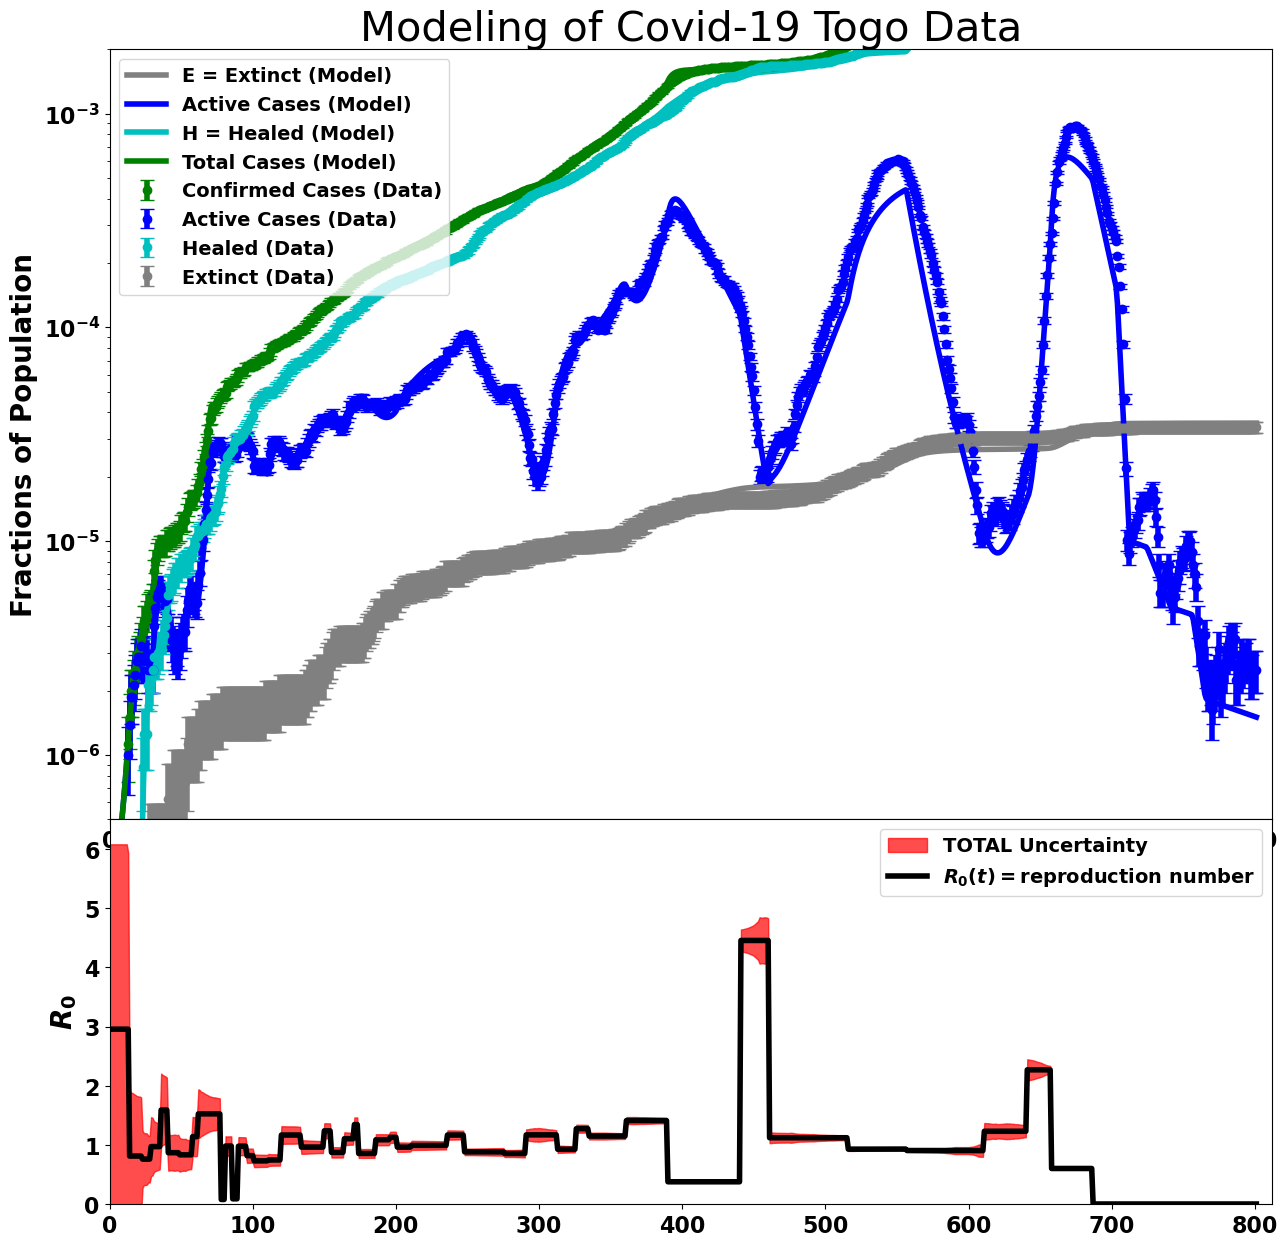

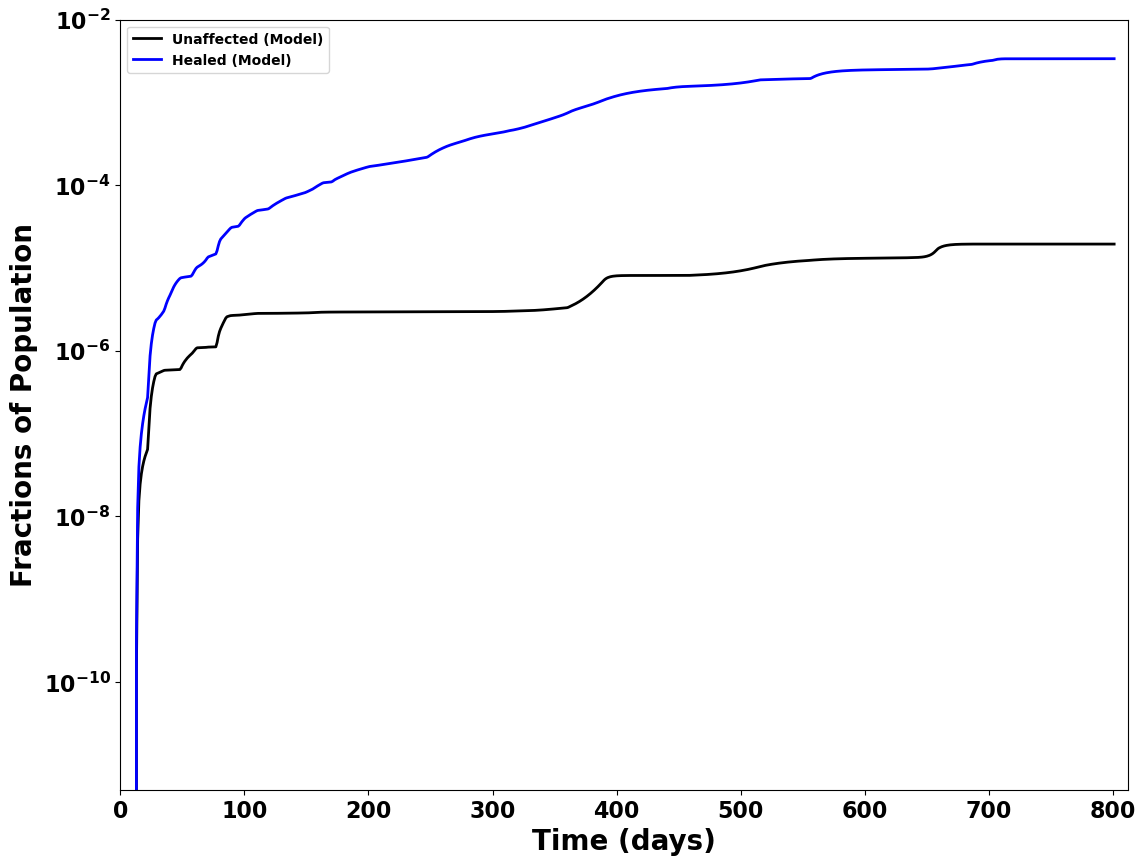

In [45]:
#Model

fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

plt.errorbar(t, Dinfecteds,yerr=error_total_case,fmt='o',color='g',label='Confirmed Cases (Data)', elinewidth =4, capsize = 5)
plt.errorbar(t ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active Cases (Data)', elinewidth =4, capsize = 5)
plt.errorbar(t ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed (Data)', elinewidth =4, capsize = 5)
plt.errorbar(t ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct (Data)', elinewidth =4, capsize = 5)

plt.plot(t, E,'gray',label='E = Extinct (Model)',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H = Healed (Model)',linewidth=4) # plotting t, b separately 
plt.plot(t, E+H+actif_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)

plt.yscale('log')
plt.ylim(5*10**-7, 2*10**-3)
plt.xlim(0, Ndays+10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
plt.title('Modeling of Covid-19 Togo Data',fontsize=30)
plt.legend()
ax.legend(loc=2, prop={'size': 20})

plt.legend(loc='upper left',prop={'size':14})
plt.savefig("Modeling of Covid-19 Togo", dpi=300, bbox_inches='tight')


ax1=plt.subplot(gs[1], sharex=ax0)

fig.savefig('SIDARTHE_model_fitting2Oct2020LinScaleTogo.png')


ax1=plt.subplot(gs[1], sharex=ax0)


alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#t = np.linspace(0, 67, 67)

plt.fill_between(t ,Rzero_minusT,Rzero_plusT,color='r',alpha=alpha,label='TOTAL Uncertainty')
plt.plot(t,R0,'k',label='$R_{0}(t)=$reproduction number', lw=4) # plotting t, c separately

plt.xlim(0, Ndays+10)
plt.ylim(0,6.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Basic Reproduction Number (R0)_Cameroon ',fontsize=20)
#plt.xlaime in days",fontsize=20)
plt.ylabel("$R_{0}$",fontsize=20)
plt.legend(loc='upper right',prop={'size':14})

#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)
plt.subplots_adjust(hspace=.0)
plt.savefig("Modeling of Covid-19, Togo Data", dpi=300, bbox_inches='tight')



#Uneffected
fig = plt.figure(figsize=(13,10))
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
#plt.plot(data_time ,Unaffected,'black', label='Unaffected and Healed',linewidth=2)
plt.plot(t ,U,'black', label='Unaffected (Model)',linewidth=2)
plt.plot(t ,H,'b', label='Healed (Model)',linewidth=2)
# plotting t, c separately 
#plt.plo
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(0.5*10**-11, 10**-2)
plt.xlim(0, Ndays+10)
#ax.axis([0, 334, 0, 0.01])
 

#plt.title('Unaffected_Mozambique',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
ax.legend(loc=4, prop={'size': 20},frameon=False)
plt.ylabel("Fractions of Population",fontsize=20)
plt.yscale("log")
plt.legend()
#plt.grid()
#plt.grid()
plt.savefig("UnaffectedandHealded_Togo.pdf", dpi=300, bbox_inches='tight')
plt.savefig("UnaffectedandHealded_Togo.png", dpi=300, bbox_inches='tight')


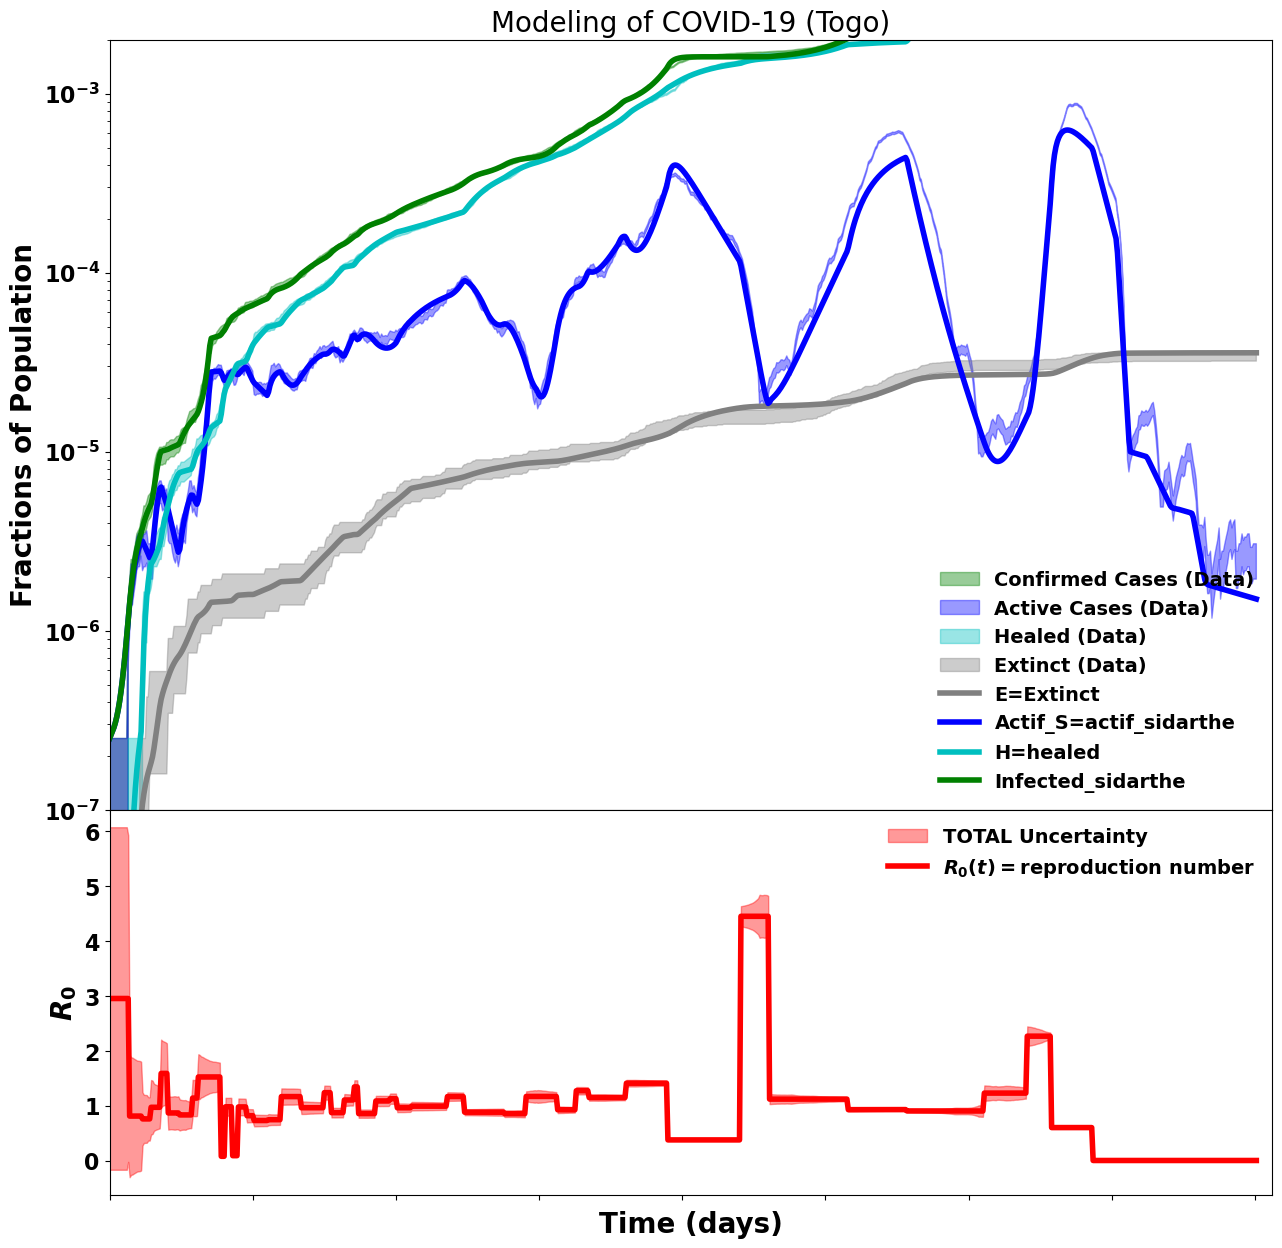

In [46]:
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])

ax0=plt.subplot(gs[0])
ax0.set_yscale('log')

alpha=.4
width = 4



plt.fill_between(t ,Dinfectedm,Dinfectedp,color='g',alpha=alpha,label='Confirmed Cases (Data)')
plt.fill_between(t ,Dactifm,Dactifp,color='b',alpha=alpha,label='Active Cases (Data)')
plt.fill_between(t ,Drecoveredm,Drecoveredp,color='c',alpha=alpha,label='Healed (Data)')
plt.fill_between(t ,Ddeadm,Ddeadp,color='gray',alpha=alpha,label='Extinct (Data)')

plt.plot(t, E,'gray',label='E=Extinct',linewidth=4) # plotting t, c separately 
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=4) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=4) # plotting t, b separately 
plt.plot(t, E+H+actif_sidarthe, 'g',label='Infected_sidarthe',linewidth=4)

plt.yticks(fontsize=16)
plt.yscale('log')
plt.ylim(10**-7, 2*10**-3)
#plt.xlim(0, 400)
#plt.ylim(4*10**-8, 2*10**-3)## Change the 2*10**-3 if it is too large for your country's data
plt.ylabel('Fractions of Population',fontsize=20)
plt.title('Modeling of COVID-19 (Togo)', fontsize=20)#+str([ r'{}:{}'.format(parm_names[i], parm[param_days][i]) for i in range(len(parm[0])) ] ), fontsize=9)
plt.legend(loc=4,prop={'size':14}, frameon=False)
plt.grid(False)
ax0.set_xticklabels([])
ax=plt.subplot(gs[1], sharex=ax0)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

## In the following change Ro with its appropriate name in your code 
ax=plt.subplot(gs[1])

plt.fill_between(t ,Rzero_minusT,Rzero_plusT,color='r',alpha=alpha,label='TOTAL Uncertainty')
plt.plot(t,R0,'r',label='$R_{0}(t)=$reproduction number', lw=4) # plotting t, c separately


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
## Totsl_time is the total numbers of days. Mine is 325
Total_time = Ndays
plt.xlim(0, Ndays+10)
plt.xlabel("Time (days)", fontsize=20)
plt.subplots_adjust(hspace=.0)
plt.grid(False)
plt.ylabel(r'$R_0$', fontsize=20)
plt.legend()
ax.legend(loc=1, prop={'size': 14}, frameon=False)
plt.subplots_adjust(hspace=.0)
plt.grid(False)
## Change Ghana with the name of your country
fig.savefig('ModelingOfCOVID19Togo26032021.png', dpi=300, bbox_inches='tight')
fig.savefig('ModelingOfCOVID19Togo26032021.pdf', dpi=300, bbox_inches='tight')


In [47]:

Goodness=[]
Goodness1=[]

for i in range(Ndays):
    Goodness.append(1)
    
for i in Goodness:
    Goodness1.append(i*1e7)

print(len(Goodness))


802


In [48]:
#Dinfecteds/(E+H+actif_sidarthe), (Dactifs/actif_sidarthe), Drecovereds/H, Ddeads/E
#np.seterr(divide='ignore', invalid='ignore')

uncert_infectedf=np.divide(error_total_case, E+H+actif_sidarthe)
uncert_actif=np.divide(error_actif,actif_sidarthe)
uncert_dead=np.divide(error_dead,E)
uncert_recovered=np.divide(error_recovered,H)
#print(uncert_dead)

out=np.divide(Dinfecteds,Infected_sidarthe)
out1=np.divide(Dactifs,actif_sidarthe)
out2=np.divide(Ddeads,E)
out3=np.divide(Drecovereds,H)
#print(out1)
#uncert_actif
#out1+uncert_actif

/tmp/ipykernel_30800/3439822846.py:6: RuntimeWarning: invalid value encountered in true_divide
  uncert_dead=np.divide(error_dead,E)
/tmp/ipykernel_30800/3439822846.py:7: RuntimeWarning: invalid value encountered in true_divide
  uncert_recovered=np.divide(error_recovered,H)
/tmp/ipykernel_30800/3439822846.py:12: RuntimeWarning: invalid value encountered in true_divide
  out2=np.divide(Ddeads,E)
/tmp/ipykernel_30800/3439822846.py:13: RuntimeWarning: invalid value encountered in true_divide
  out3=np.divide(Drecovereds,H)


/tmp/ipykernel_30800/1366826793.py:38: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t, Ddeads/E,'gray', lw=4)
/tmp/ipykernel_30800/1366826793.py:54: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t, Drecovereds/H,'c', lw=2)


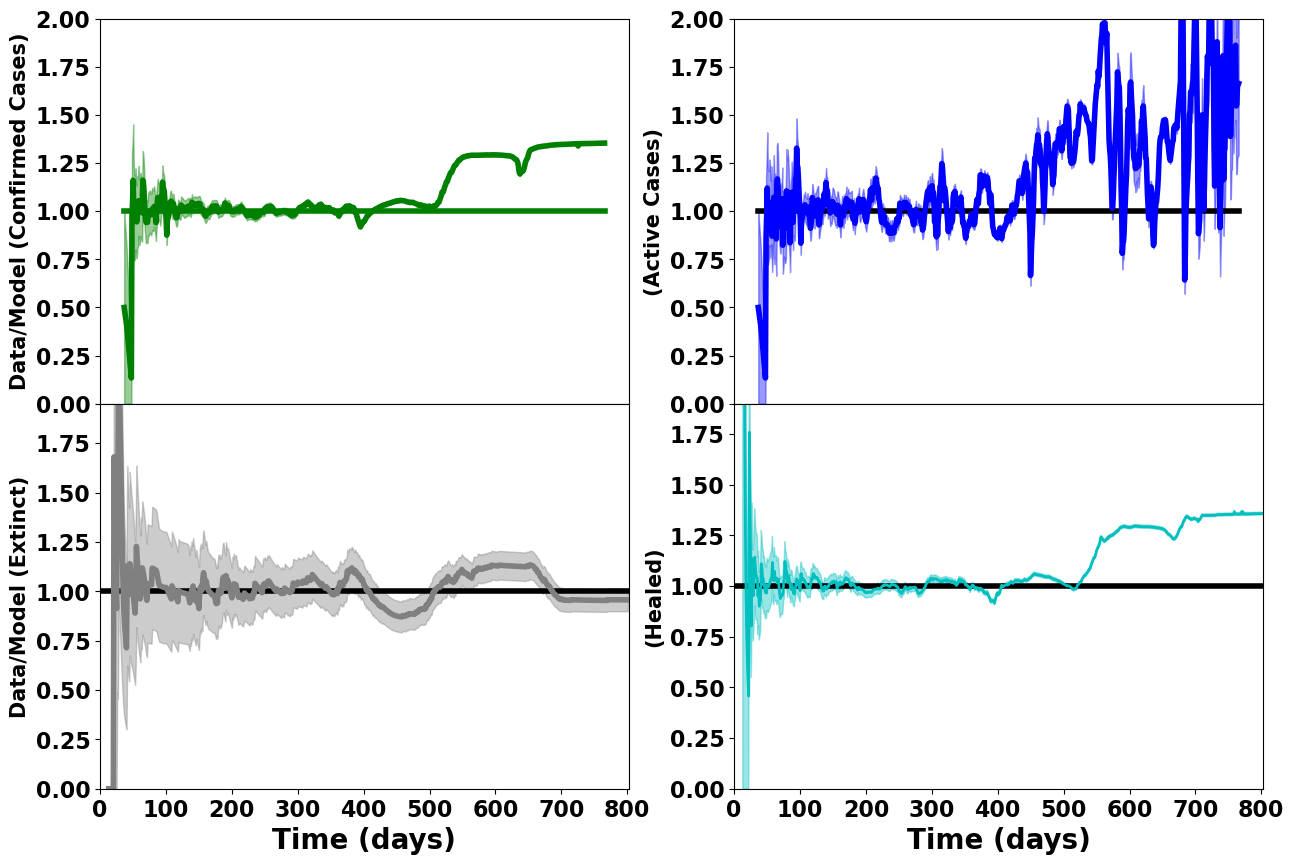

In [49]:
fig = plt.figure(figsize=(15,10))
gs=gridspec.GridSpec(2,2, height_ratios=[1,1], hspace=0)

ax0=plt.subplot(gs[0])

##  For Dinfected

plt.plot(t,Goodness,'g',linewidth=4)
plt.plot(t, Dinfecteds/(E+H+actif_sidarthe),'g', lw=4)
plt.fill_between(t ,out-uncert_infectedf,out+uncert_infectedf,color='g',alpha=alpha)


ax.set_xticklabels([])
plt.yticks(fontsize=16)
plt.ylabel("Data/Model (Confirmed Cases)",fontsize=15)
plt.grid(False)
plt.ylim(0,2)

ax1=plt.subplot(gs[1])
## For Dactifs


plt.plot(t,Goodness,'k',linewidth=4)
plt.plot(t,out1,'b', lw=4)
plt.fill_between(t,out1-uncert_actif,out1+uncert_actif,color='b',alpha=alpha)

ax1.set_xticklabels([])
plt.yticks(fontsize=16)
plt.ylabel("(Active Cases)",fontsize=15)
plt.grid(False)
plt.ylim(0,2)

## For Ddeads
ax2=plt.subplot(gs[2])


plt.plot(t,Goodness,'k',linewidth=4)
plt.plot(t, Ddeads/E,'gray', lw=4)
plt.fill_between(t ,out2-uncert_dead,out2+uncert_dead,color='gray',alpha=alpha)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel('Data/Model (Extinct)',fontsize=15)
plt.grid(False)
plt.xlim(0, Total_time)
plt.ylim(0,1.95)

## Drecovereds
ax3=plt.subplot(gs[3])


plt.plot(t,Goodness,'k',linewidth=4)
plt.plot(t, Drecovereds/H,'c', lw=2)
plt.fill_between(t ,out3-uncert_recovered,out3+uncert_recovered,color='c',alpha=alpha)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("(Healed)",fontsize=15)
plt.grid(False)
plt.xlim(0, Total_time)
plt.ylim(0,1.9)

plt.show()
fig.savefig('GoodnessR0Togo04.png', dpi=300, bbox_inches='tight')
fig.savefig('GoodnessR0Togo04.pdf', dpi=300, bbox_inches='tight')


In [50]:
for  i,v in enumerate(Dinfecteds):
    if v>1.0:
        print(i,v)

Dinfecteds[365]        

0.00094975

In [51]:
#Dinfecteds/(E+H+actif_sidarthe), (Dactifs/actif_sidarthe), Drecovereds/H, Ddeads/E
#np.seterr(divide='ignore', invalid='ignore')

uncert_infectedf=np.divide(error_total_case, E+H+actif_sidarthe)
uncert_actif=np.divide(error_actif,actif_sidarthe)
uncert_dead=np.divide(error_dead,E)
uncert_recovered=np.divide(error_recovered,H)

dosage=((np.sqrt((dados['good'])))/N)
uncert_dosage=(np.divide(dosage, V))/N
#print(uncert_dead)

out=np.divide(Dinfecteds,Infected_sidarthe)
out1=np.divide(Dactifs,actif_sidarthe)
out2=np.divide(Ddeads,E)
out3=np.divide(Drecovereds,H)
#print(out1)

/tmp/ipykernel_30800/3846711871.py:6: RuntimeWarning: invalid value encountered in true_divide
  uncert_dead=np.divide(error_dead,E)
/tmp/ipykernel_30800/3846711871.py:7: RuntimeWarning: invalid value encountered in true_divide
  uncert_recovered=np.divide(error_recovered,H)
/tmp/ipykernel_30800/3846711871.py:15: RuntimeWarning: invalid value encountered in true_divide
  out2=np.divide(Ddeads,E)
/tmp/ipykernel_30800/3846711871.py:16: RuntimeWarning: invalid value encountered in true_divide
  out3=np.divide(Drecovereds,H)


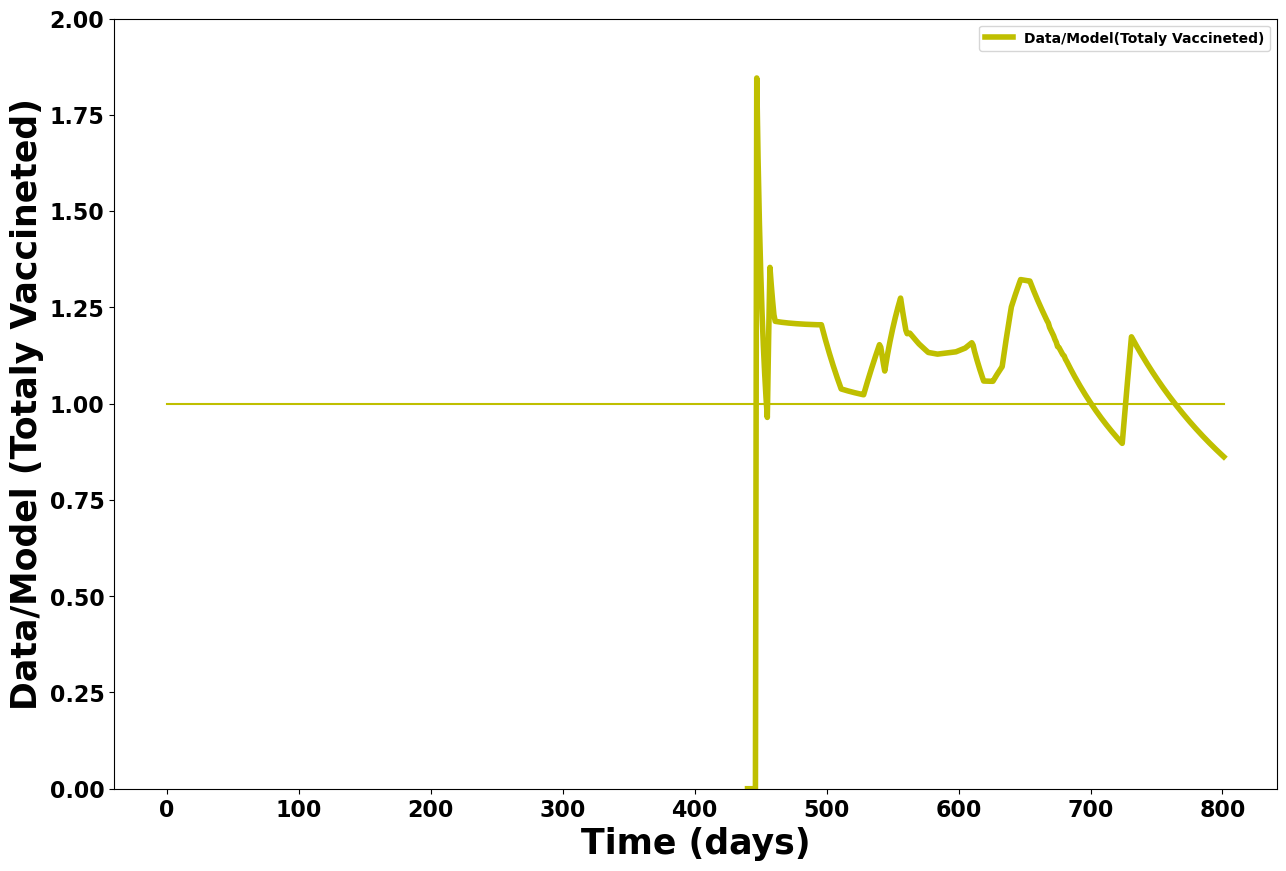

In [52]:
fig = plt.figure(figsize=(15,10))
alpha=0.7


out5=np.divide(dados['Goodness_vaacine'], V)
#print('\nOutput arry: \n',out)
#plt.plot(data_time,out,'g',linewidth=2)
plt.plot(t,Goodness,'y')
plt.plot(t,out5, 'y',label='Data/Model(Totaly Vaccineted)',linewidth=4)
#plt.fill_between(data_time ,out5-uncert_dosage,out5+uncert_dosage,color='y',alpha=alpha)
#plt.fill_between(t5 ,out5[t5]-uncert_dosage[t5],out5[t5]+uncert_dosage[t5],color='y',alpha=alpha)
#plt.errorbar(data_time ,out,yerr=uncert_dosage,fmt='o', color='g',label='Dead',elinewidth=4,capsize=10)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=25)
plt.ylabel("Data/Model (Totaly Vaccineted)",fontsize=25)
#plt.title('Goodness For Totaly Vaccinated ',fontsize=30)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)
 

plt.savefig("Goodness for vaccine", dpi=300, bbox_inches='tight')

@np.vectorize
def constant_function(x):
    return 2


t1 = np.arange(0.0, 1.0, 0.1)
plt.plot(t1, constant_function(t1))
plt.show()

w"q:L @np.vectorize
def constant_function(x):
    return 2


t1 = np.arange(0.0, 1.0, 0.1)
plt.plot(t1, constant_function(t1))
plt.show()

##### To see 43e2sdrthfxsg;ivhj3e2 5how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
infect=np.sqrt((data_infected))
dea=np.sqrt((data_dead))
act=np.sqrt((data_active))
recov=np.sqrt((data_recovered))


# In[135]:


uncert_infectedf=(np.divide(infect, Infected_sidarthe))/N
uncert_actif=(np.divide(act, actif_sidarthe))/N
uncert_dead=(np.divide(dea, E))/N
uncert_recovered=(np.divide(recov, H))/N


# In[136]:


infect=((np.sqrt((data_infected)))/N)
dea=((np.sqrt((data_dead)))/N)
act=((np.sqrt((data_active)))/N)
recov=((np.sqrt((data_recovered)))/N)

uncert_infectedf=np.divide(infect, Infected_sidarthe)
uncert_actif=np.divide(act, actif_sidarthe)
uncert_dead=np.divide(dea, E)
uncert_recovered=np.divide(recov, H)